# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

## Loading the dataset

Doing a deep copy of the data for our analysis purposes.

In [2]:
df = pd.read_csv("Loan_Modelling.csv")
data = df.copy()

## Data Overview

In [3]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.shape

(5000, 14)

####Observations
The dataset has 5000 rows and 14 columns which are our features for the analysis.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

####Observations
There are no null values in the dataset. All columns are currently numeric, with data types as int64 or float64. Some of these columns are clearly categorical, which we will treat accordingly later.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


####Observations
- ID seems to be the unique customer identifier in this dataset.
- The age of customers varies from 23 years (minimum) to 67 years (maximum), with a mean at 45 years and a standard deviation of 11.4 years.
- The experience of customers varies from -3 years (minimum) to 43 years (maximum), with a mean at 20 years and a standard deviation of 11.4 years. We will investigate the negative minimum value further.
- The annual income of customers varies from \$8000 (minimum) to \$224,000 (maximum), with a mean at \$74,000 and a standard deviation of \$46,000.
- ZIPCode, Family and Education should be categorical variables and we will treat them accordingly.
- The average family size for each customer is 2 with 50% of all customers having a family size of 2 and above.
- There are only 2 unique values in the personal_loan, securities_account, cd_account, online and credit_card columns, which means they are also categorcial.
- Personal_loan is the target or class variable.
- CCavg i.e. average spending on credit cards per month varies from \$0K to \$10K, with a mean of \$1.93K and a standard deviation of \$1.7K.
- Mortgage varies from \$0K to \$635K, with a mean of \$56.5K and a standard deviation of \$101K. Clearly this variable has a right skewed distribution towards higher mortgage values.

In [8]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
data.duplicated().sum()

0

####Observations
There are no duplicate rows in the data.

## Exploratory Data Analysis.

###Univariate analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
def create_outliers(feature: str, data=df):
    """ 
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

##Univariate Analysis

###Age

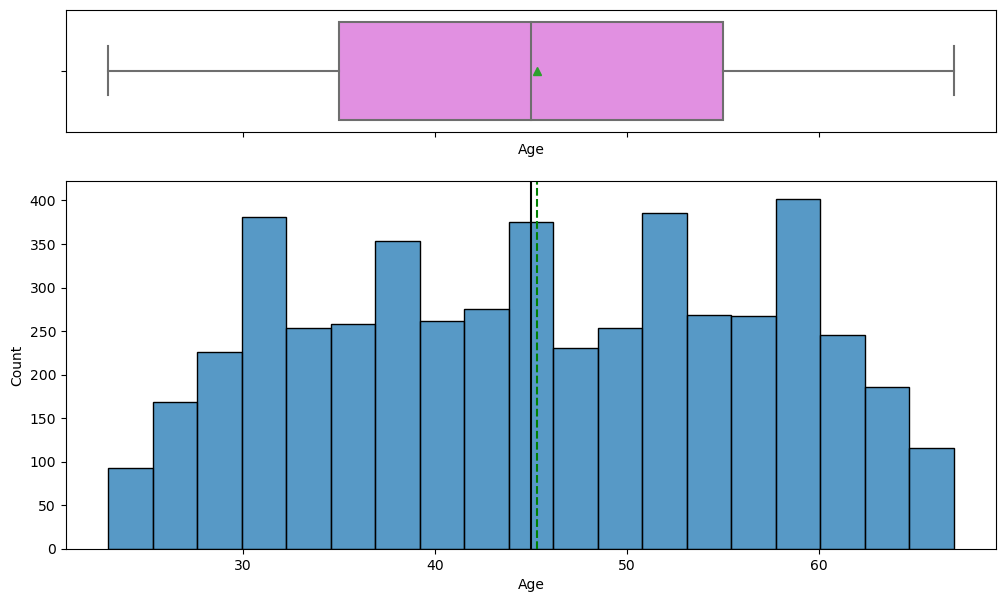

In [13]:
histogram_boxplot(data, "Age")

####Observations
Age is uniformally distributed with 5 local maxima and there are no outliers.

###Experience

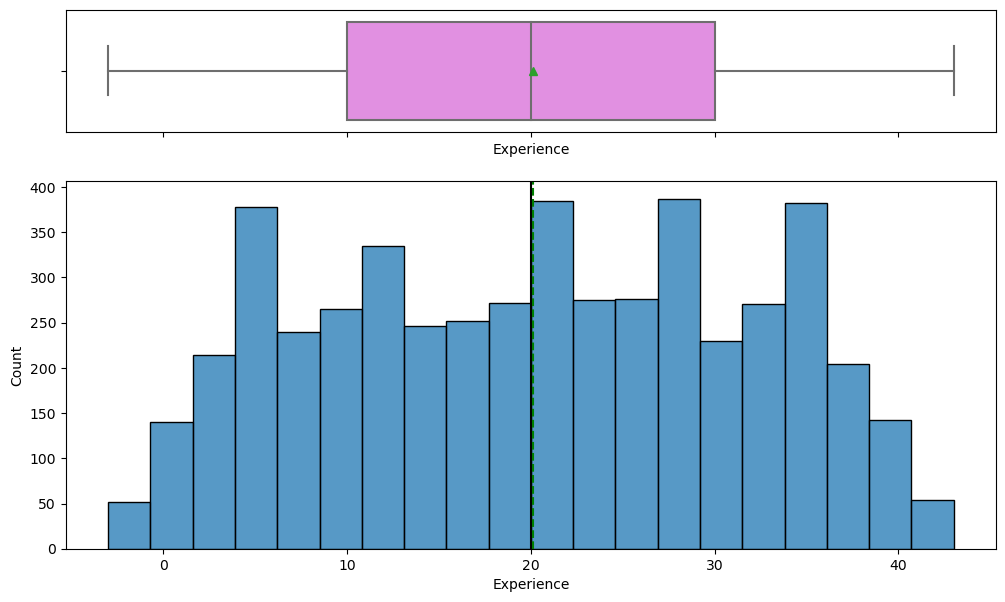

In [14]:
histogram_boxplot(data, "Experience")

In [15]:
data[data['Experience']<0]['Experience'].count()

52

In [16]:
data[data['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

####Observations
- Experience is also normally distributed with 5 local maxima and no outliers.
- 52 customers between the age of 23 to 29 have a negative value for experience. This could be a data entry error.

###Income

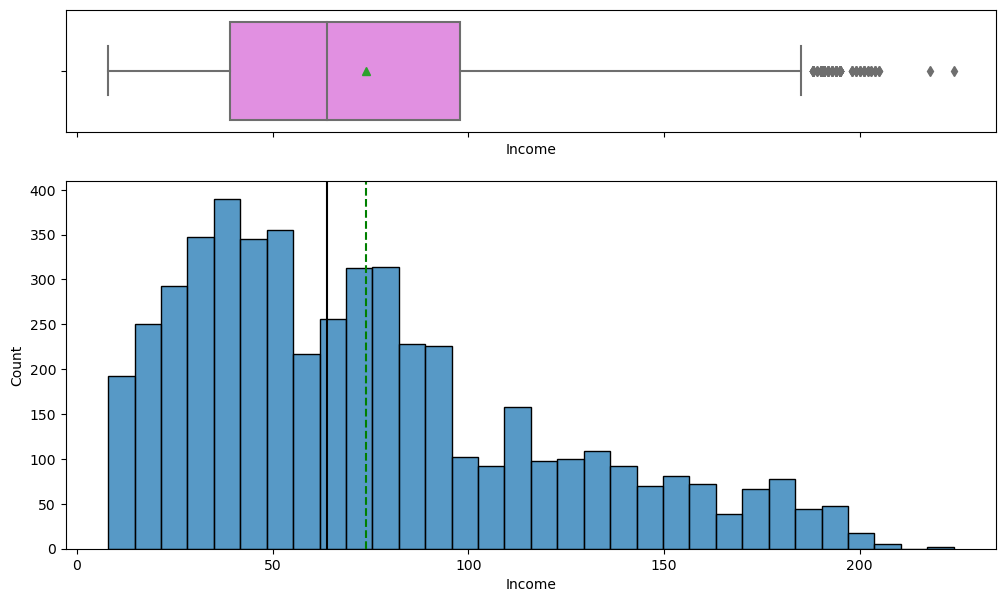

In [17]:
histogram_boxplot(data, "Income")

In [18]:
outliers = create_outliers('Income', data)
outliers['Personal_Loan'].value_counts()

0    54
1    42
Name: Personal_Loan, dtype: int64

####Observations
- Income is right skewed with many outliers in the high income bracket.
- While income has many outliers, 42 of the 96 high-income customers have accepted personal loan offers. 

###ZIPCode

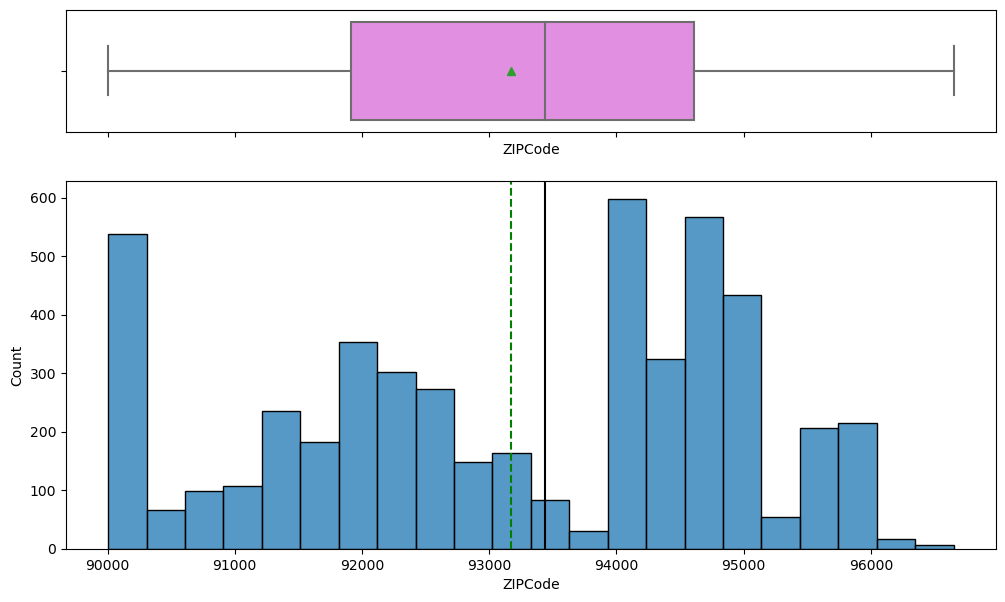

In [19]:
histogram_boxplot(data, "ZIPCode")

####Observations
- There is a huge variation in zipcode and we will do some feature engineering to extract more value from this data later.

###Family

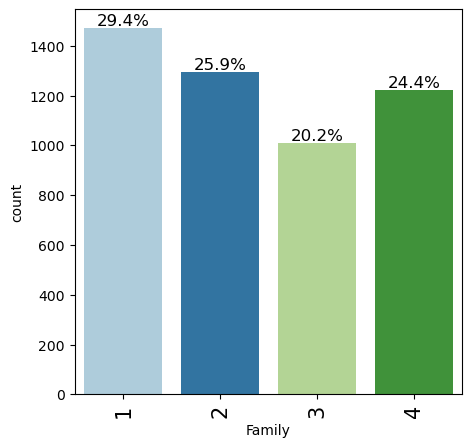

In [20]:
labeled_barplot(data, "Family", perc=True)

####Observations
29.4% of the customers are single. 44.4% seem to have 1 or more dependents.

CCAvg

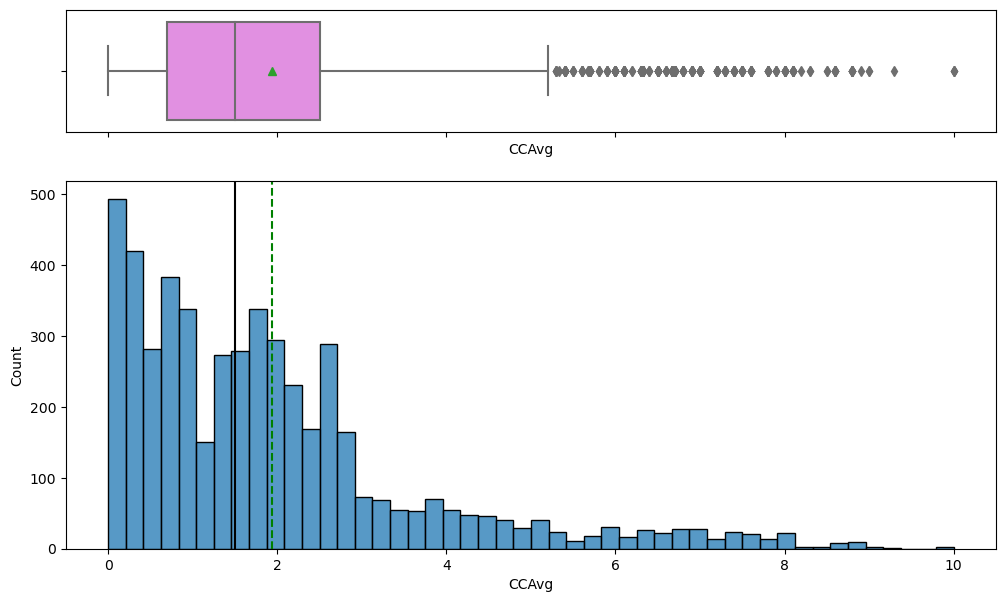

In [21]:
histogram_boxplot(data, "CCAvg")

In [22]:
outliers = create_outliers('CCAvg', data)
outliers['Personal_Loan'].value_counts()

0    199
1    125
Name: Personal_Loan, dtype: int64

####Observations
- Monthly credit card spending also has a lot of outliers.
- Even in the outliers, we have 39% accepting the personal loan offers.

###Education

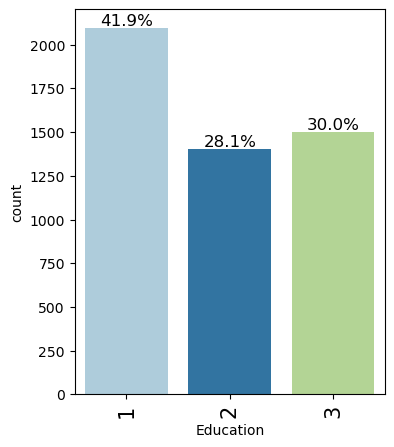

In [23]:
labeled_barplot(data, "Education", perc=True)

####Observations
41.9% customers are educated at the undergraduate level.

###Mortgage

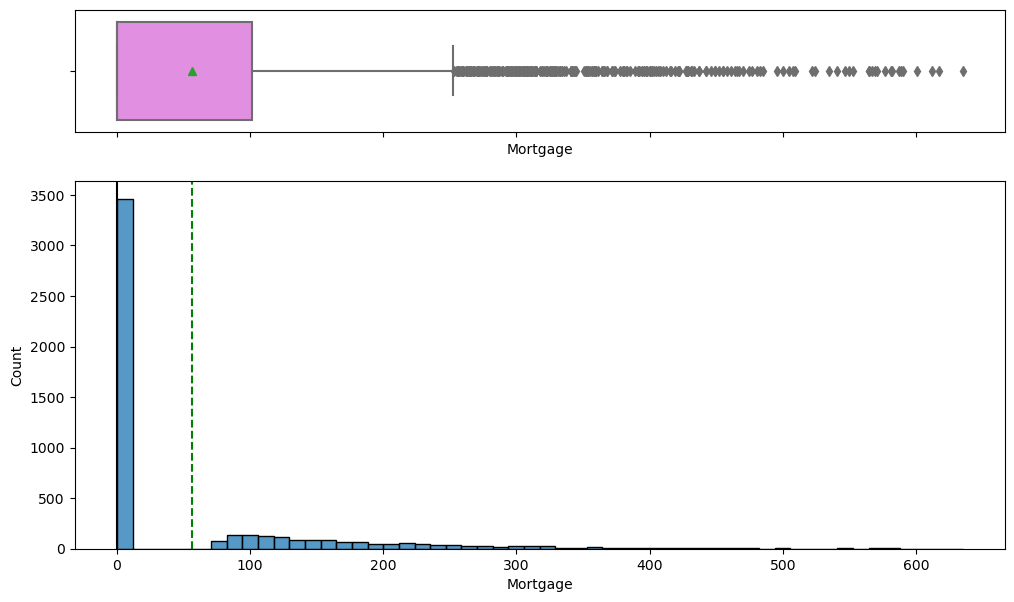

In [24]:
histogram_boxplot(data, "Mortgage")

In [25]:
outliers = create_outliers('Mortgage', data)
outliers['Personal_Loan'].value_counts()

0    198
1     93
Name: Personal_Loan, dtype: int64

####Observations
- Mortgage data is heavily skewed to the right with a lot of customers who don't have a mortgage loan.
- On the other end there are many outliers where customers have high mortgages.
- In the outliers, 32% customers have accepted the loan offers.

###Personal Loan

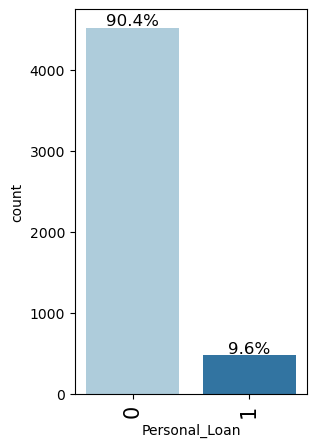

In [26]:
labeled_barplot(data, "Personal_Loan", perc=True)

####Observations
- As said in the problem statement, the loan offer was accepted by 9.6% of customers.
- This shows that our dataset is highly unbalanced hence we will use class weights to build our decision trees.

###Securities Account

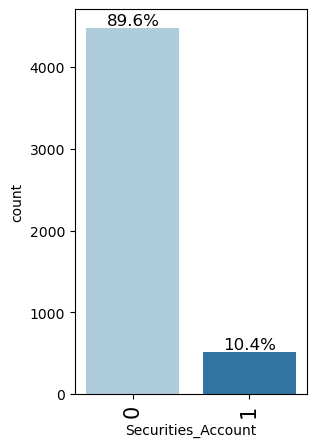

In [27]:
labeled_barplot(data, "Securities_Account", perc=True)

####Observations
89.6% customers do not have a Securities Account with the bank.

###CD Account

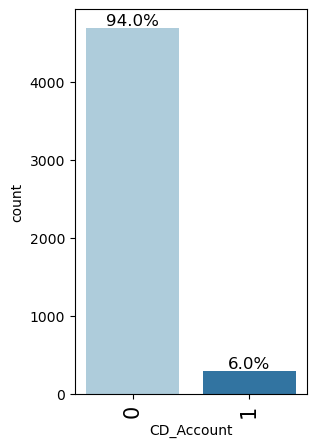

In [28]:
labeled_barplot(data, "CD_Account", perc=True)

####Observations
94% customers do not have a CD account with the bank.

###Online

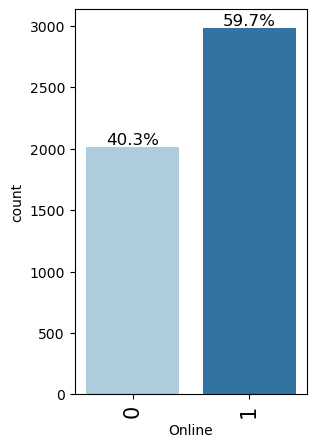

In [29]:
labeled_barplot(data, "Online", perc=True)

####Observations
59.7% customers have an online account with the bank.

###Credit Card

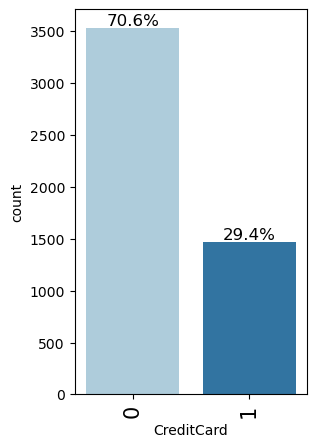

In [30]:
labeled_barplot(data, "CreditCard", perc=True)

####Observations
29.4% customers have credit cards with other banks.

###Bivariate Analysis

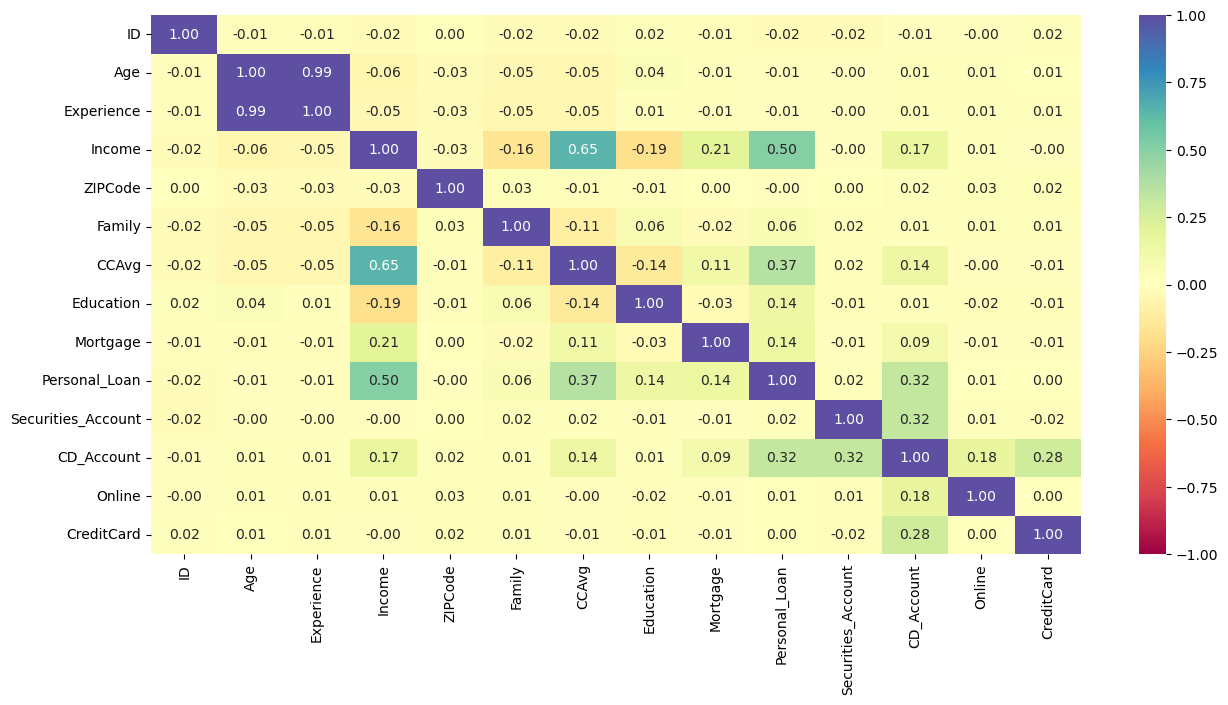

In [31]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####Observations
- Experience and Age are strongly correlated
- Personal_loan is fairly positively correlated with Income, CCavg, Education, CD_account and Mortgage.
- ZIPCode, CreditCard, Online, Age, Experience, Family and Securities_Account columns seem to have relatively low correlations with Personal_Loan

In [32]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [33]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Personal Loan vs Age

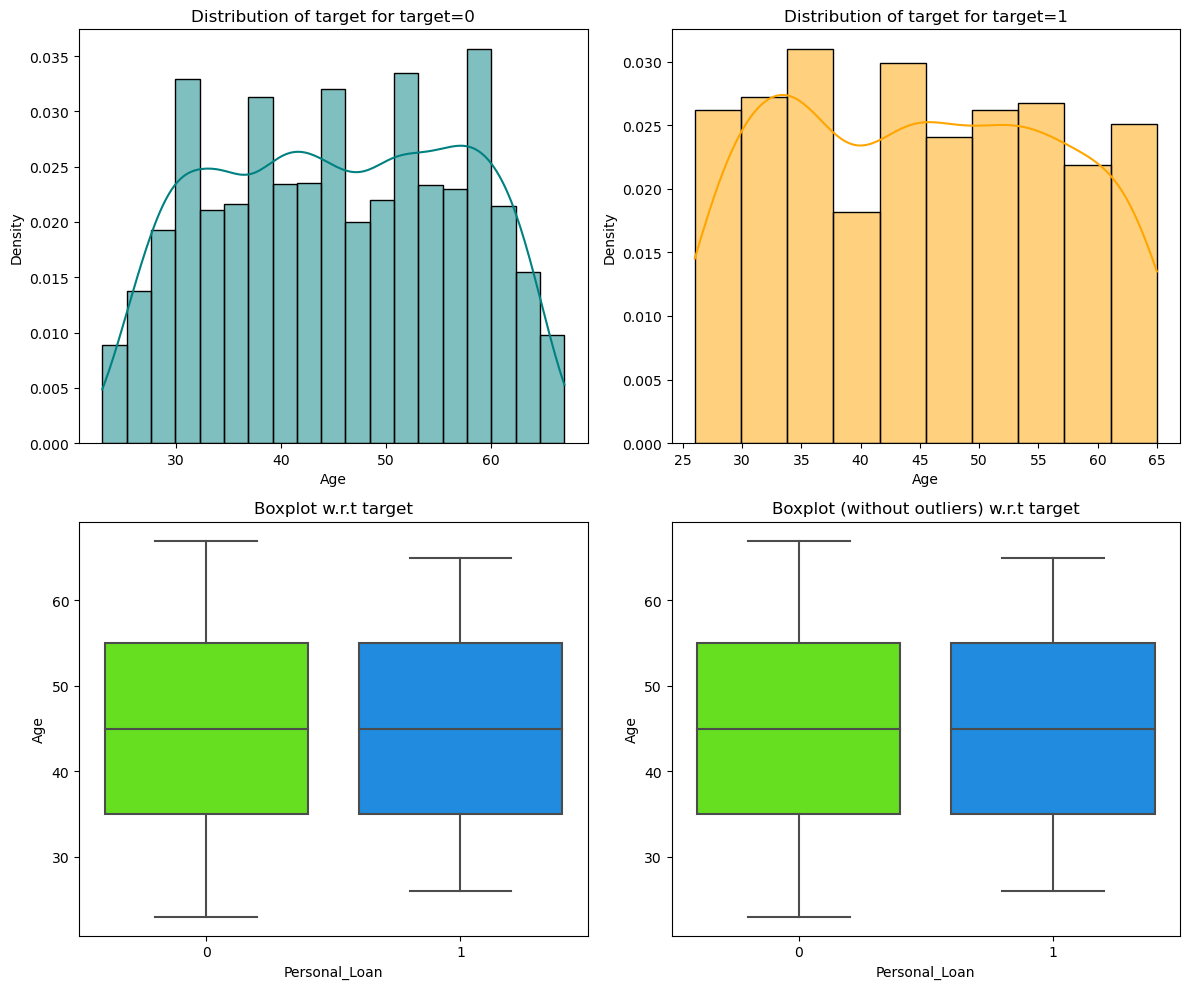

In [34]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

####Observations
- Mean age for customers accepting and not accepting personal loans is 45 years.
- Customers between 35-45 years of age are accepting more personal loans than other age groups.

###Personal Loan vs Experience

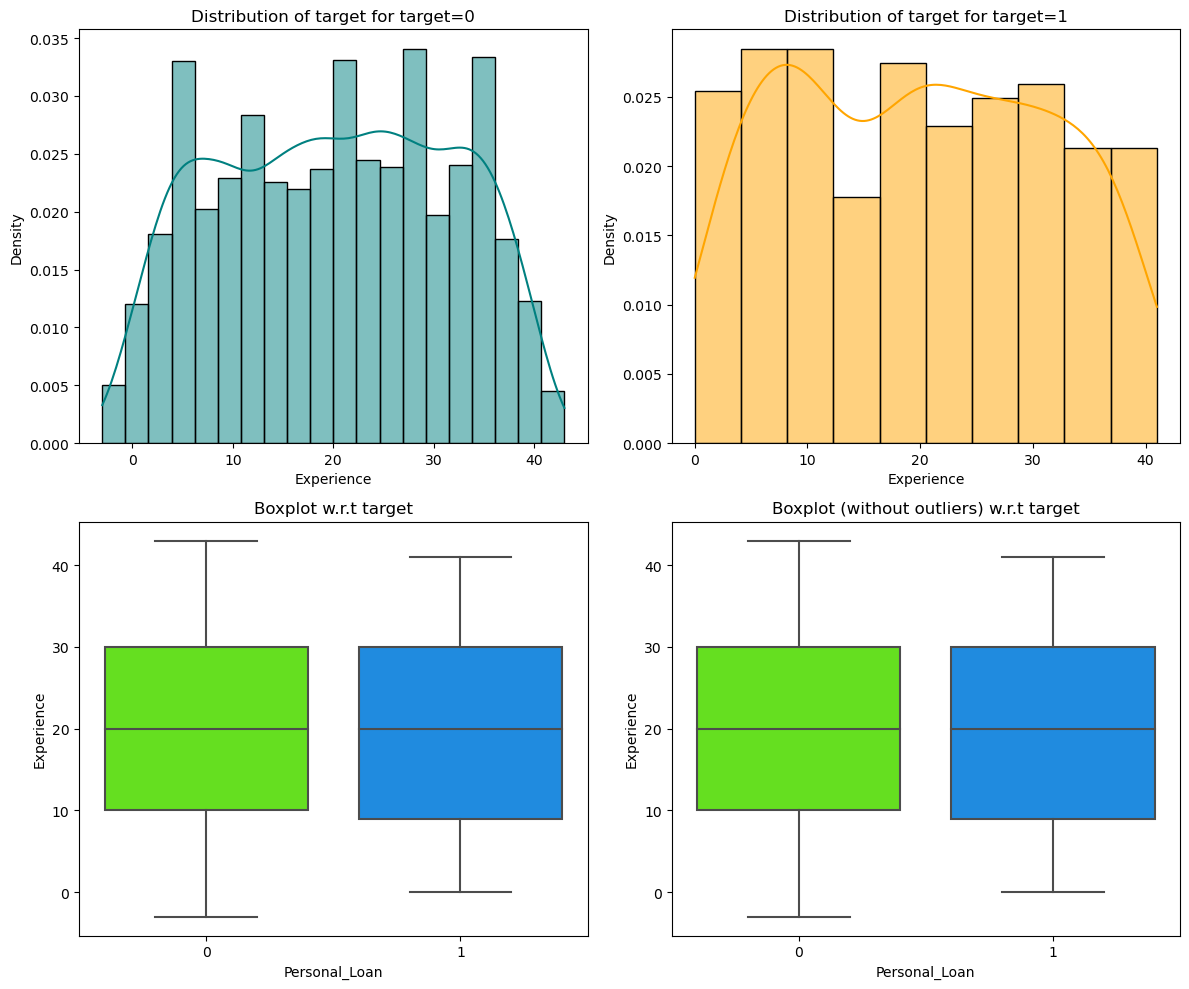

In [35]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

####Observations
- Mean Experience for customers accepting and not accepting personal loans is 20 years.
- Customers with 10 years of experience are accpeting more loans than others.

###Personal Loan vs Income

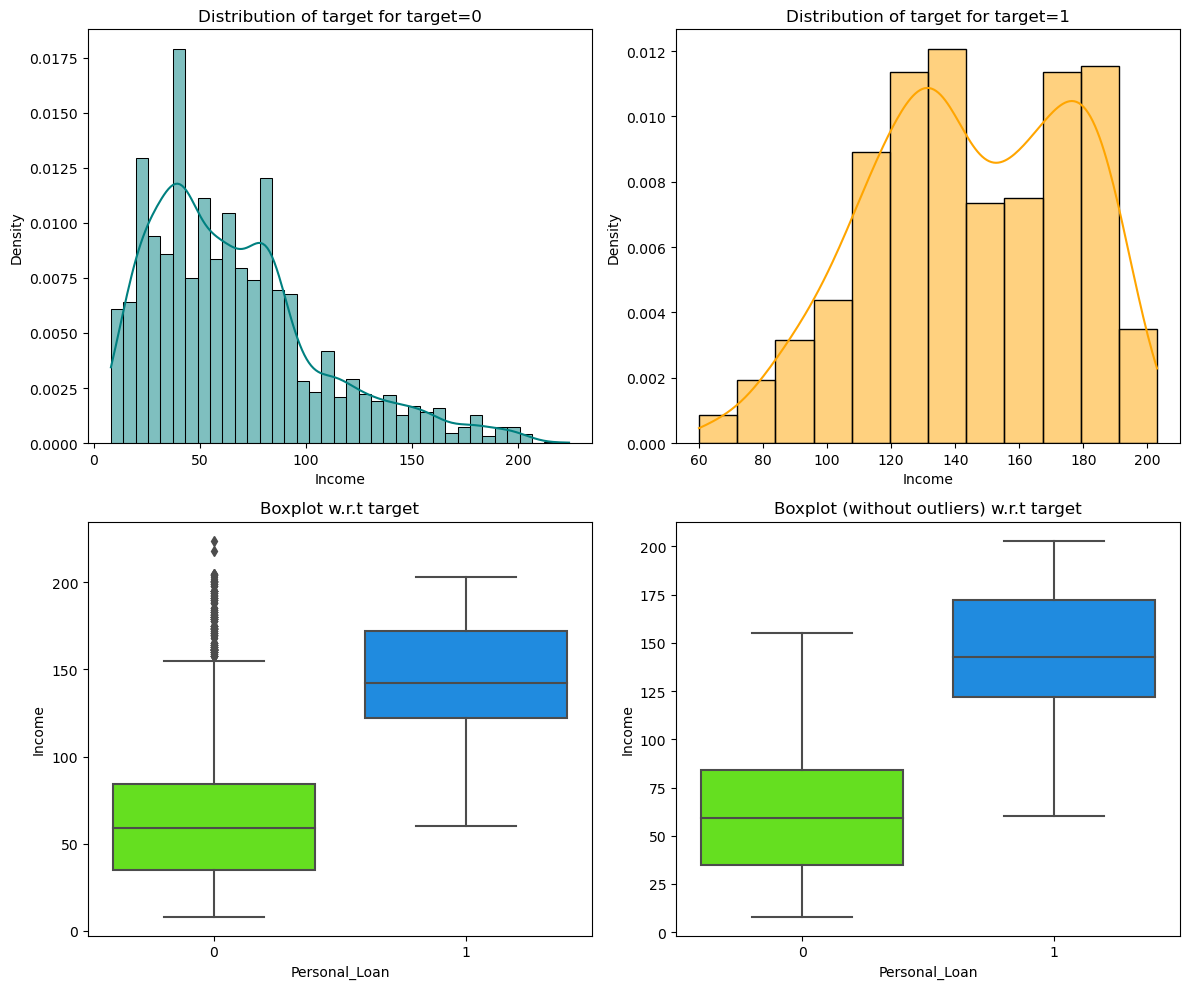

In [36]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

####Observations
- Mean income for the customers who did not accept the loan is approx USD \$65K.
- Mean income for the customers who did accept the loan is approx USD \$145K.
- The higher the income, the more chances the customer will accept a personal loan, especially incomes >$100K.

###Personal Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


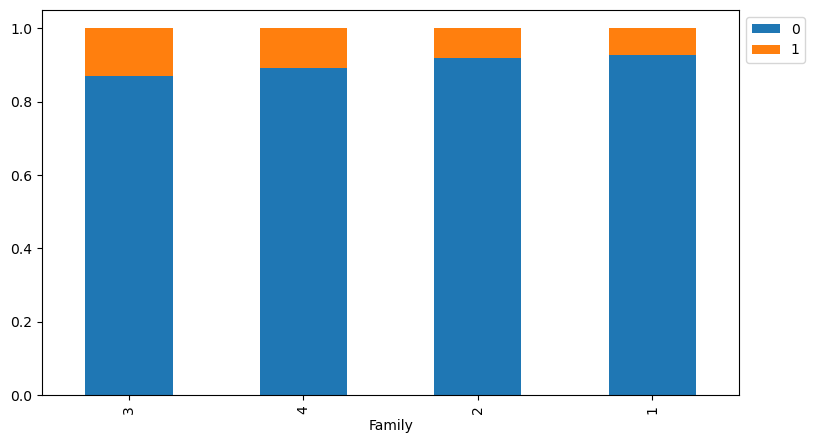

In [37]:
stacked_barplot(data, "Family", "Personal_Loan")

####Observations
Customers with family size of 2 and above are more likely to accept personal loans than those who are single.

###Personal Loan vs CCAvg

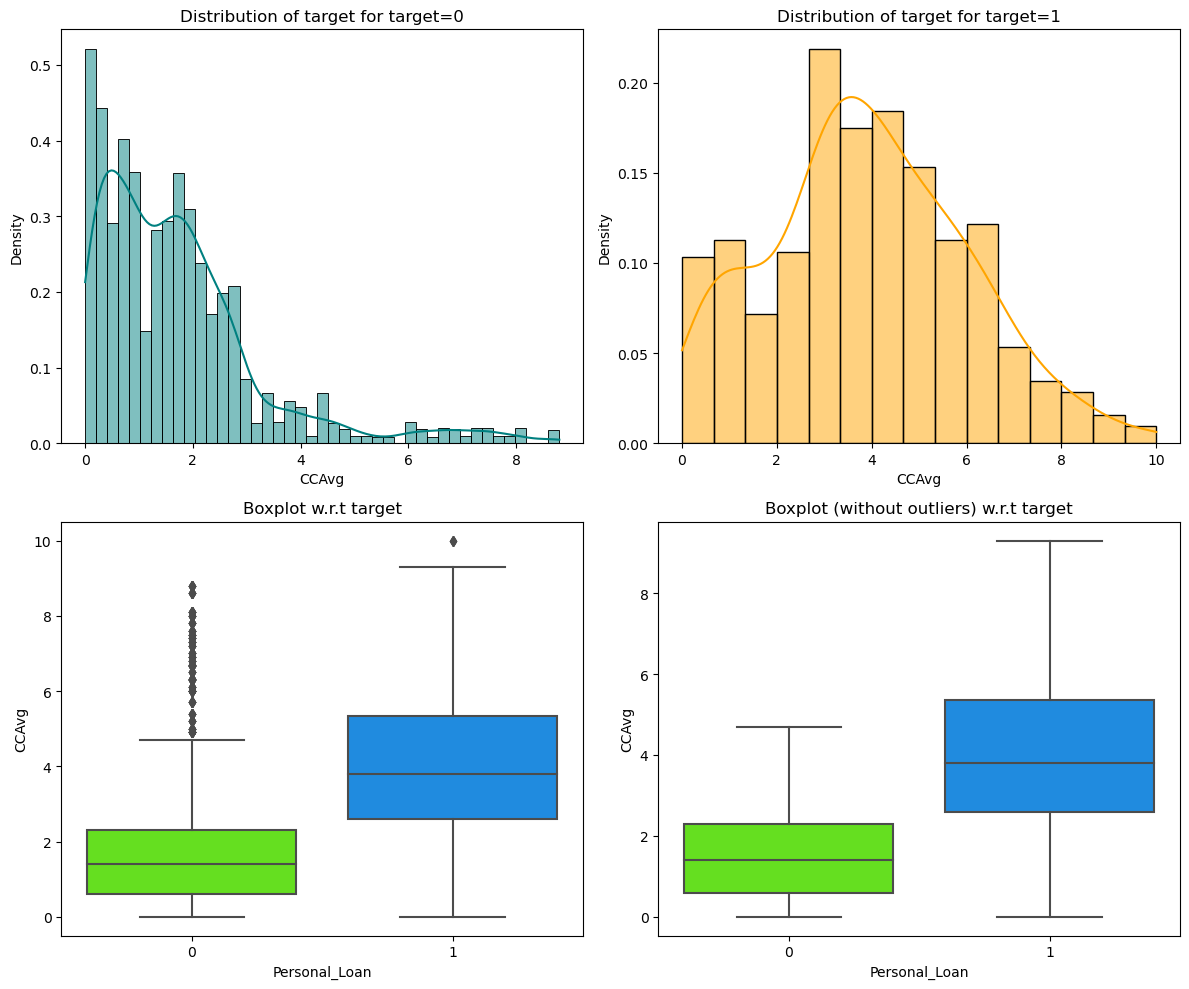

In [38]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

####Observations
Customers with an average monthly credit card spending above $2000 are more likely to accept personal loan offers.

###Personal Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


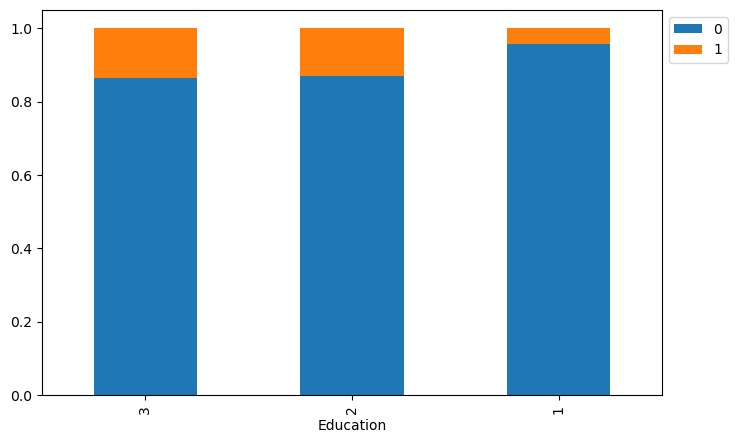

In [39]:
stacked_barplot(data, "Education", "Personal_Loan")

####Observations
Customers with higher levels of education are more likely to accept personal loan offers.

###Peronal Loan vs Mortgage

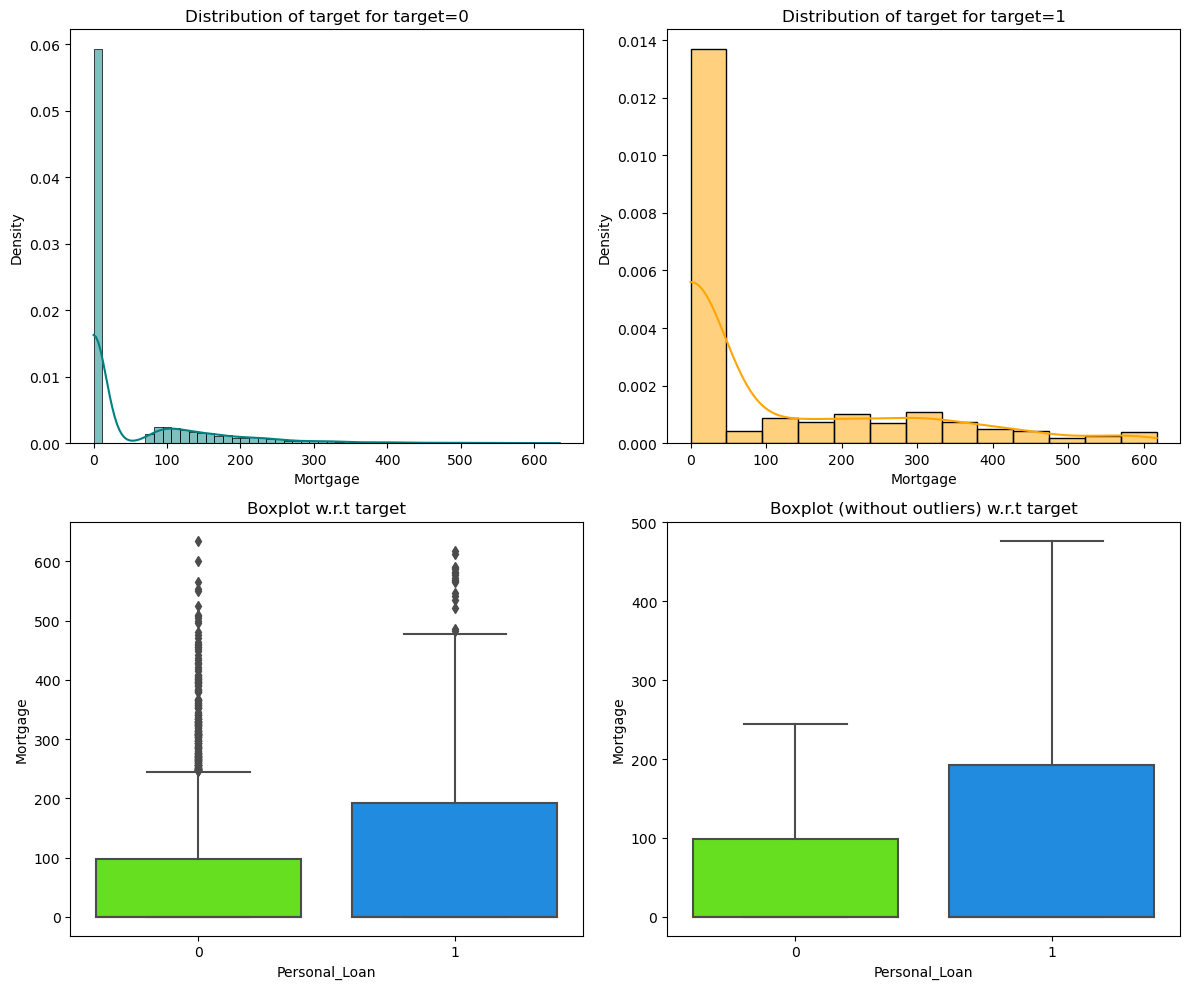

In [40]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

####Observations
Customers who have a mortgage are more likely to accept personal loan offers.

###Peronal Loan vs ZIPCode

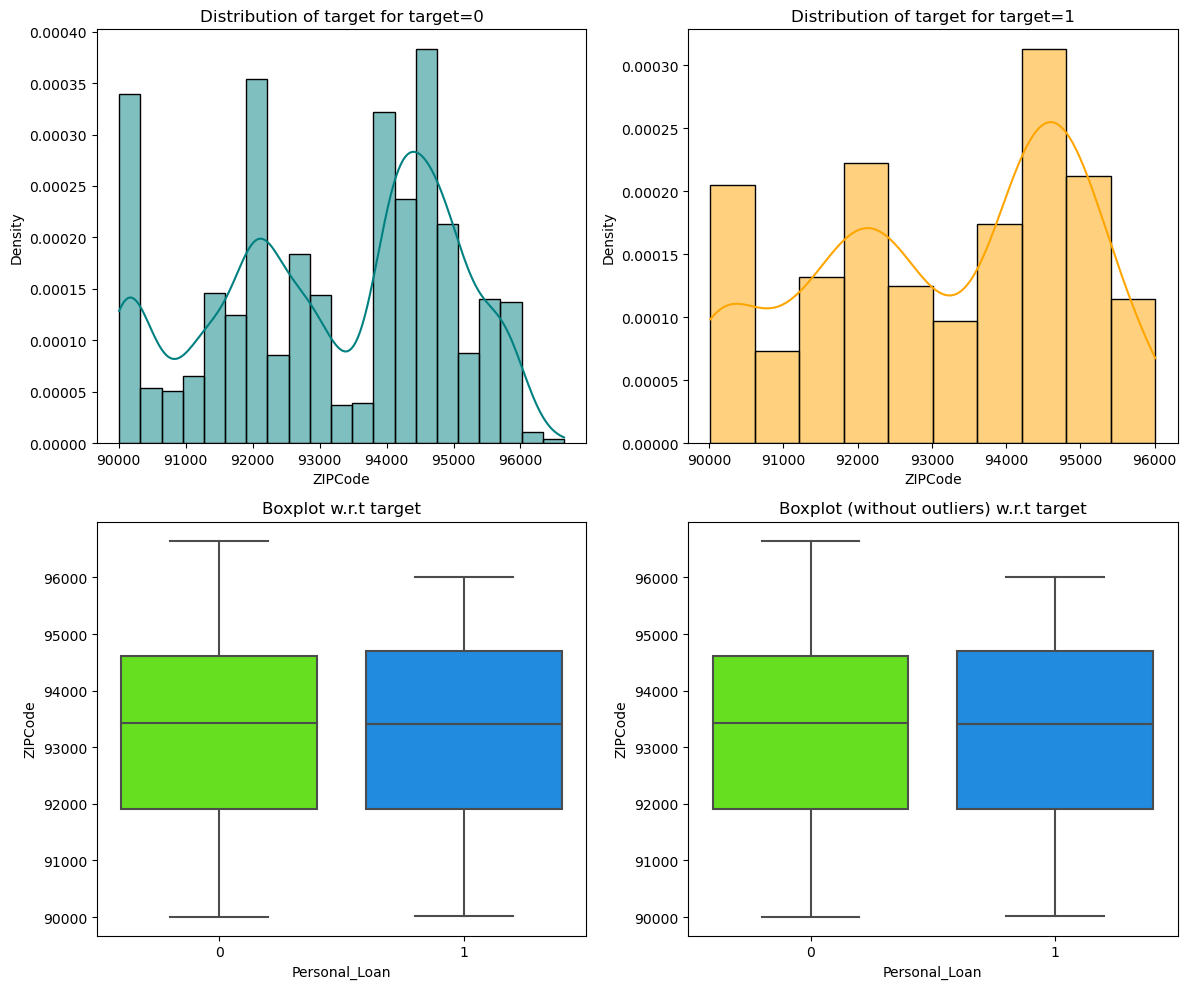

In [41]:
distribution_plot_wrt_target(data, "ZIPCode", "Personal_Loan")

####Observations
As seen from the heatmap too, zipcode doesn't have any effect on personal loan offer acceptances at first glance.

###Personal Loan vs Securities Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


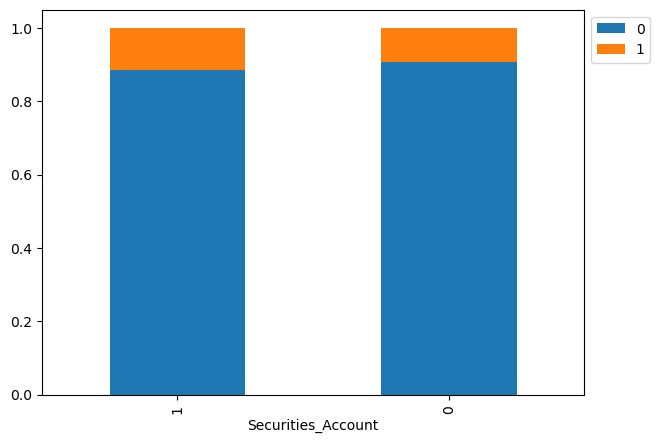

In [42]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

###Observations
Customers having a securities account have a slightly higher likelihood of accepting personal loan offers.

###Personal Loan vs CD Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


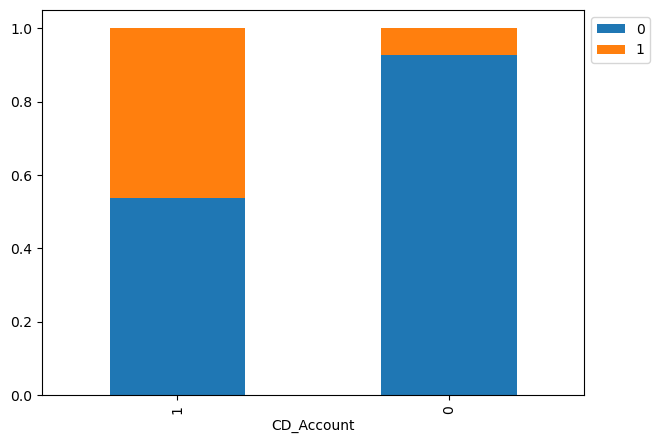

In [43]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

####Observations
Customers with a CD Account tend to accept personal loan offers more.

###Personal Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


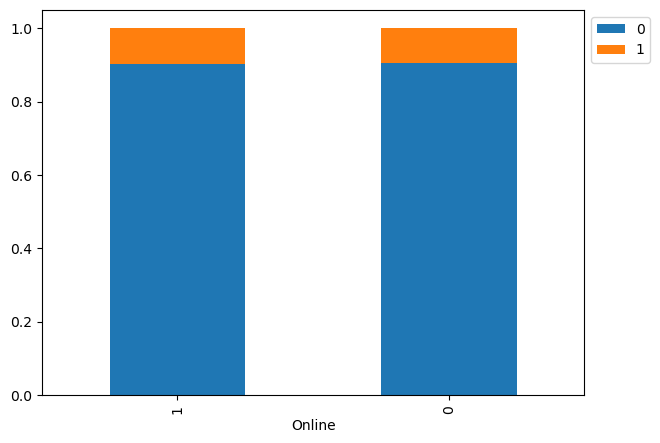

In [44]:
stacked_barplot(data, "Online", "Personal_Loan")

####Observations
There are equal number of customers having or not having access to online banking accepting and rejecting personal loans.

###Personal Loan vs Credit Card

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


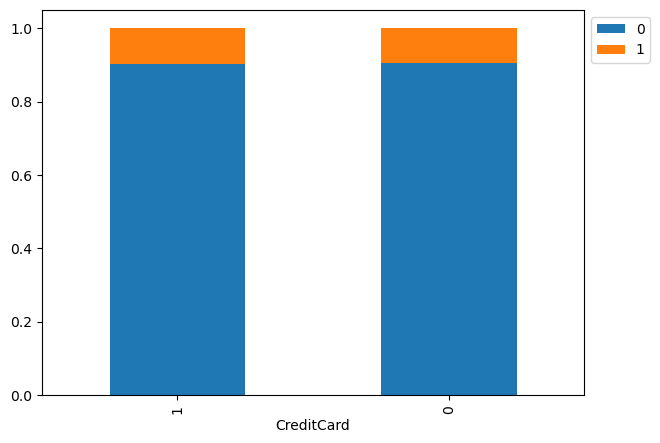

In [45]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

####Observations
There are equal number of customers with and without credit cards from other banks accepting and rejecting personal loans.

## Data Preprocessing

###Feature Engineering

####Replacing negative values in the Experience column with their respective absolute values

In [46]:
data['Experience'] = df['Experience'].abs()
data[data['Experience']<0]['Experience'].count()

0

####Extracting state and county from ZIPCode

In [47]:
#import the searchengine from uszipcode library
!pip install uszipcode
from uszipcode import SearchEngine
search = SearchEngine()

def get_county(x):
    return search.by_zipcode(x).county

def get_state(x):
    return search.by_zipcode(x).state

In [48]:
#create 2 empty lists to fill with county and state for each customer
all_counties = []
all_states = []

#create a for loop to loop on the zipcodes, extract the city and state and fill the lists
for i in np.arange(0,5000):
    try:
        county = get_county(data["ZIPCode"].iloc[i])
        all_counties.append(county)
        state = get_state(data["ZIPCode"].iloc[i])
        all_states.append(state)
    except:
        all_counties.append(np.nan)
        all_states.append(np.nan)
    continue

In [49]:
#Adding the county and state lists as new columns in the dataset
data['County'] = all_counties
data['State'] = all_states
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,State
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,CA
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,CA
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County,CA
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County,CA
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County,CA


In [50]:
#Checking for null values in city
zip_nan = data[data['County'].isnull()]
zip_nan['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

In [51]:
#Checking for null values in state
zip_nan_state = data[data['State'].isnull()]
zip_nan_state['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

In [52]:
#Filling in state and city manually post Google search
zip_dict = {'92717':'Orange County, CA', '96651':'El Dorado, CA', '92634':'Orange County, CA', '93077':'Ventura County, CA'}

#Create a function to fill the missing values
def fill_nan(data, indxs, value, column):
    for i in indxs:
        data[column].iloc[i]=value
        
#Create a for loop to fill in the missing city and state values    
for i in zip_dict.keys():
    null_rows = data[data['ZIPCode']==int(i)].index
    fill_nan(data, null_rows, zip_dict[str(i)].split(',')[0], 'County')
    fill_nan(data, null_rows, zip_dict[str(i)].split(',')[1], 'State')

#confirm null values are removed in City and State columns
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
County                0
State                 0
dtype: int64

In [53]:
#Spot checking state values
data['State'].value_counts()

CA     4966
 CA      34
Name: State, dtype: int64

In [54]:
#Removing blank spaces
data['State'].replace(' CA','CA',inplace=True)
data['State'].value_counts()

CA    5000
Name: State, dtype: int64

In [55]:
data.County.nunique()

39

Personal_Loan              0    1   All
County                                 
All                     4520  480  5000
Los Angeles County       984  111  1095
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            333   33   366
San Francisco County     238   19   257
Sacramento County        169   15   184
Monterey County          113   15   128
Contra Costa County       73   12    85
San Mateo County         192   12   204
Ventura County           104   11   115
Santa Barbara County     143   11   154
Yolo County              122    8   130
Santa Cruz County         60    8    68
Kern County               47    7    54
Marin County              48    6    54
Riverside County          50    6    56
Sonoma County             22    6    28
San Luis Obispo County    28    5    33
Shasta County             15    3    18
Solano County             30    3    33
San Bernardino County     98    3   101


<Figure size 4000x4000 with 0 Axes>

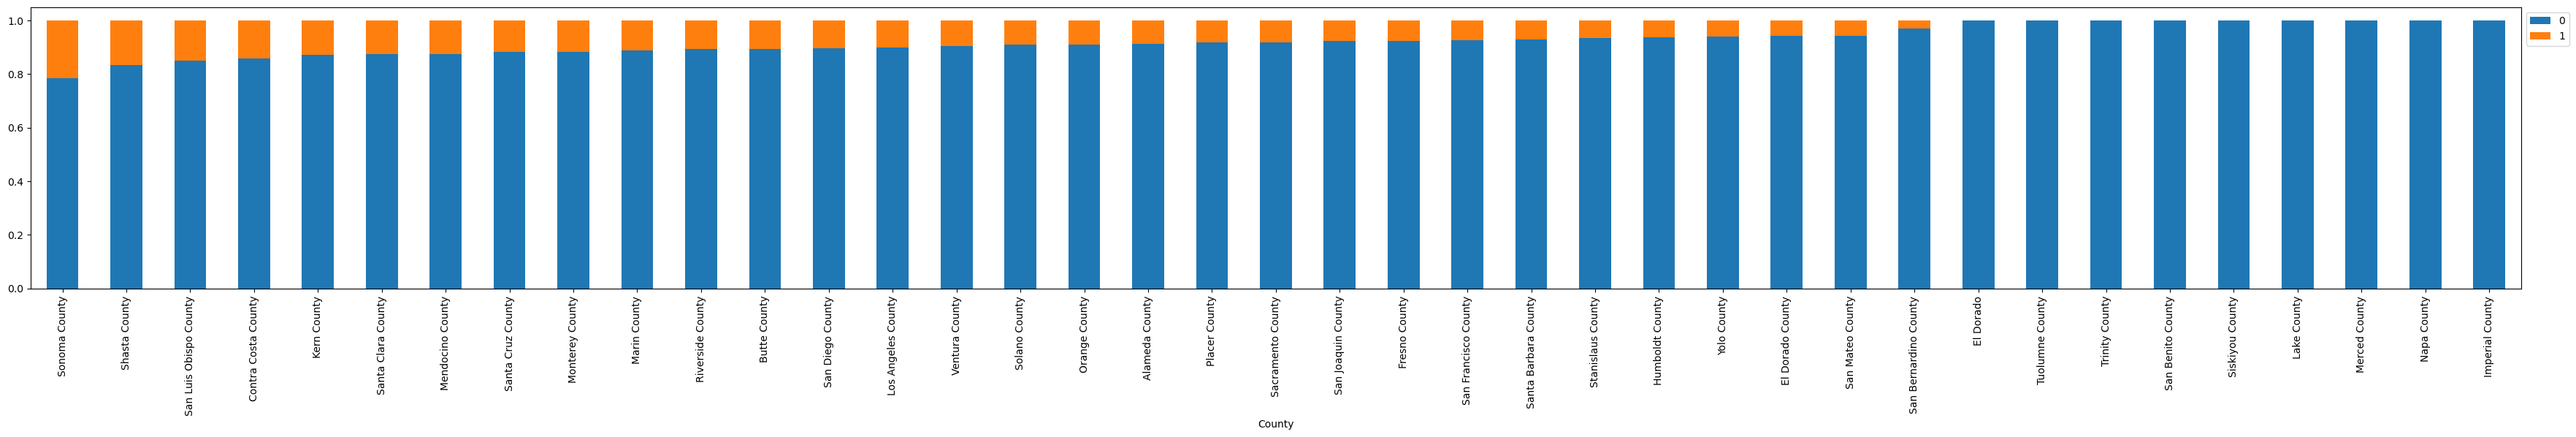

In [56]:
plt.figure(figsize=(40,40))
stacked_barplot(data, "County", "Personal_Loan")

####Observations
- All zipcodes belong to the state of California. 54.5% of the customers are from Los Angeles, Santa Clara, San Diego and Alameda counties.
- Out of the 39 counties represented in the data, 14 counties have a loan acceptance rate higher than 9.5% which is the total acceptance rate for the entire dataset.

###Outlier treatment

I'm choosing not to drop outliers because, as seen during EDA, customers having outsized mortgage values or incomes may or may not accept the personal loan offers. And since we know, anecdotally, that this reflects real life situations, it makes sense to have our model learn from these variances.

###Preparing data for modeling

Getting dummy variables for Education and County columns.

In [57]:
data = pd.get_dummies(data, columns=["County"], drop_first=True)
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,State,County_Butte County,County_Contra Costa County,County_El Dorado,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,CA,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,CA,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,CA,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dropping columns that will contribute little to no additional predictive value for our analysis: ID as it's a unique identifier, Personal Loan as it is our target variable, Experience as it is highly correlated with Age, ZIPCode as we are using County instead, State as it is uniform for all customers.

In [58]:
X = data.drop(["ID", "Personal_Loan", "Experience", "ZIPCode", "State"], axis=1)
Y = data["Personal_Loan"]
X

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,County_Butte County,County_Contra Costa County,County_El Dorado,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
0,25,49,4,1.6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,30,15,4,0.4,1,85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4997,63,24,2,0.3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4998,65,49,3,0.5,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###K-Cluster Analysis

In [59]:
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

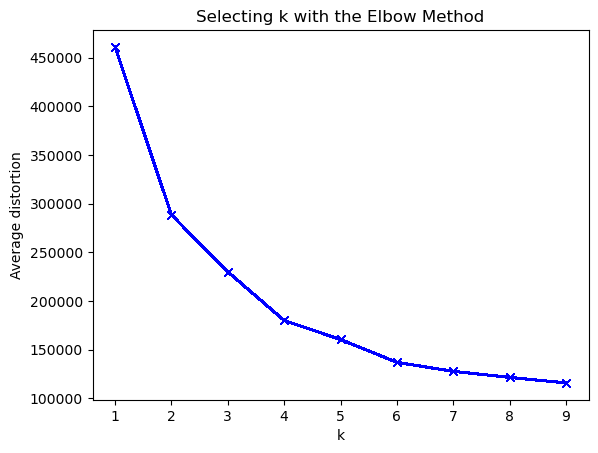

In [60]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X)
    prediction=model.predict(X)
    meanDistortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / Y)


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [61]:
# Let us first start with K = 4, the first elbow
final_model=KMeans(4)
final_model.fit(X)
prediction=final_model.predict(X)

#Append the prediction 
data_clust=data.copy()
data_clust["GROUP"] = prediction
data_clust.groupby(['GROUP']).mean()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County_Butte County,County_Contra Costa County,County_El Dorado,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
GROUP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2542.671058,45.730725,20.439752,51.663309,93199.656722,2.529252,1.387648,1.982952,0.000000,0.008911,0.105386,0.032933,0.603255,0.294847,0.004262,0.015885,0.001550,0.003487,0.004262,0.006974,0.000387,0.012786,0.000775,0.217358,0.012398,0.001550,0.001162,0.025571,0.000387,0.071678,0.005812,0.012398,0.037582,0.002712,0.017823,0.112360,0.053468,0.003100,0.005424,0.041457,0.030608,0.109260,0.012011,0.004262,0.001937,0.006587,0.005424,0.001937,0.001162,0.001550,0.022472,0.030608
1,2458.990772,45.357383,20.141779,56.987416,93206.580537,2.474832,1.566745,1.927013,141.411074,0.045302,0.106544,0.050336,0.586409,0.291107,0.003356,0.014262,0.001678,0.004195,0.006711,0.007550,0.001678,0.006711,0.001678,0.206376,0.007550,0.000839,0.000000,0.027685,0.001678,0.067114,0.004195,0.009228,0.045302,0.003356,0.020973,0.123322,0.051174,0.002517,0.006711,0.044463,0.036913,0.106544,0.015940,0.002517,0.001678,0.008389,0.004195,0.005872,0.000000,0.001678,0.023490,0.025168
2,2463.051988,44.623853,19.501529,129.174312,93174.207951,2.162080,3.044434,1.709480,343.116208,0.318043,0.094801,0.159021,0.614679,0.293578,0.009174,0.024465,0.000000,0.003058,0.003058,0.000000,0.000000,0.018349,0.000000,0.217125,0.009174,0.006116,0.000000,0.018349,0.000000,0.082569,0.000000,0.012232,0.033639,0.006116,0.027523,0.103976,0.061162,0.003058,0.000000,0.033639,0.030581,0.110092,0.015291,0.006116,0.000000,0.003058,0.009174,0.003058,0.000000,0.003058,0.021407,0.021407
3,2448.145556,44.447778,19.480000,139.287778,93030.845556,1.996667,3.605644,1.590000,1.925556,0.332222,0.102222,0.116667,0.585556,0.295556,0.001111,0.021111,0.000000,0.002222,0.006667,0.005556,0.000000,0.007778,0.000000,0.241111,0.011111,0.001111,0.001111,0.025556,0.000000,0.082222,0.004444,0.010000,0.024444,0.001111,0.023333,0.107778,0.042222,0.001111,0.012222,0.036667,0.023333,0.131111,0.014444,0.002222,0.000000,0.005556,0.006667,0.002222,0.001111,0.000000,0.024444,0.015556


####Observations
Looking at the mean data points across columns, 4 customer profiles emerge:
    1. Group 0: High income, low mortgage, family >1, higher than avg monthly credit card spending, likely don't have higher education 
    2. Group 1: High income, high mortgage, family >2, higher than avg monthly credit card spending, likely don't have higher education
    3. Group 2: Low income, no mortgage, family >2, less than avg monthly credit card spending, likely have higher education
    4. Group 3: Low income, high mortgage, family >2, higher than avg monthly credit card spending, likely have higher education

In [62]:
data_clust.groupby(['GROUP'])['Personal_Loan'].value_counts()

GROUP  Personal_Loan
0      0                2558
       1                  23
1      0                1138
       1                  54
2      0                 223
       1                 104
3      0                 601
       1                 299
Name: Personal_Loan, dtype: int64

####Observations
- Groups 0 and 1 have high loan acceptance rates at 33.2% and 31.8%
- Groups 2 and 3 have really low loan acceptance rates at 0.89% and 4.53%

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

## Model Building

### Model Evaluation Criterion

The ratio of personal loan offer accepts to rejects is almost 1:9, so if our model predicts that every customer will accept the loan offer, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

The bank management wants to explore ways of converting its depositor customers to personal loan customers, while retaining them as depositors. They want to do this by better predicting which customers might accept the loan offers. Our prediction model may do two types of wrong predictions: 
1. Predicting a customer is not going to accept but in reality the customer will accept. This is a loss of opportunity.
2. Predicting a customer is going to accept but in reality the customer will not accept. This is a loss of marketing resources.

Opportunity loss will be the greater loss as the bank will lose revenue. Therefore as the bank needs to reduce false negatives, we will aim to maximize the Recall of our model.

### Model Building

In [64]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [65]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###Initializing our model using the DecisionTreeClassifier function

- Using default 'gini' criteria to split. 
- Passing a dictionary {0: 0.094571, 1: 0.905429} as class_weight parameter to the model so the decision tree will give more weightage to class 1 i.e. loan offer acceptances. 

In [66]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion = 'gini', class_weight={0: 0.15, 1: 0.85}, random_state=1)
model.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

###Confusion Matrix - first decision tree on training data

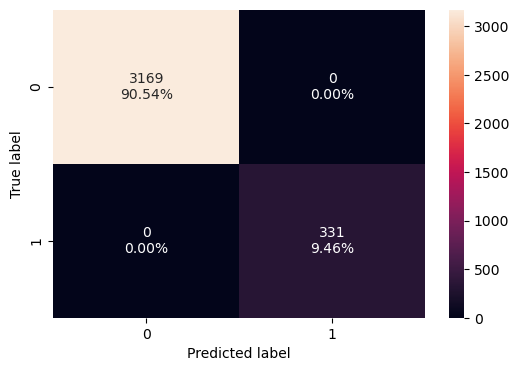

In [67]:
confusion_matrix_sklearn(model, X_train, y_train) 

In [68]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


###Visualizing the first Decision Tree

In [69]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_Solano County', 'County_Sonoma County', 'County_Sta

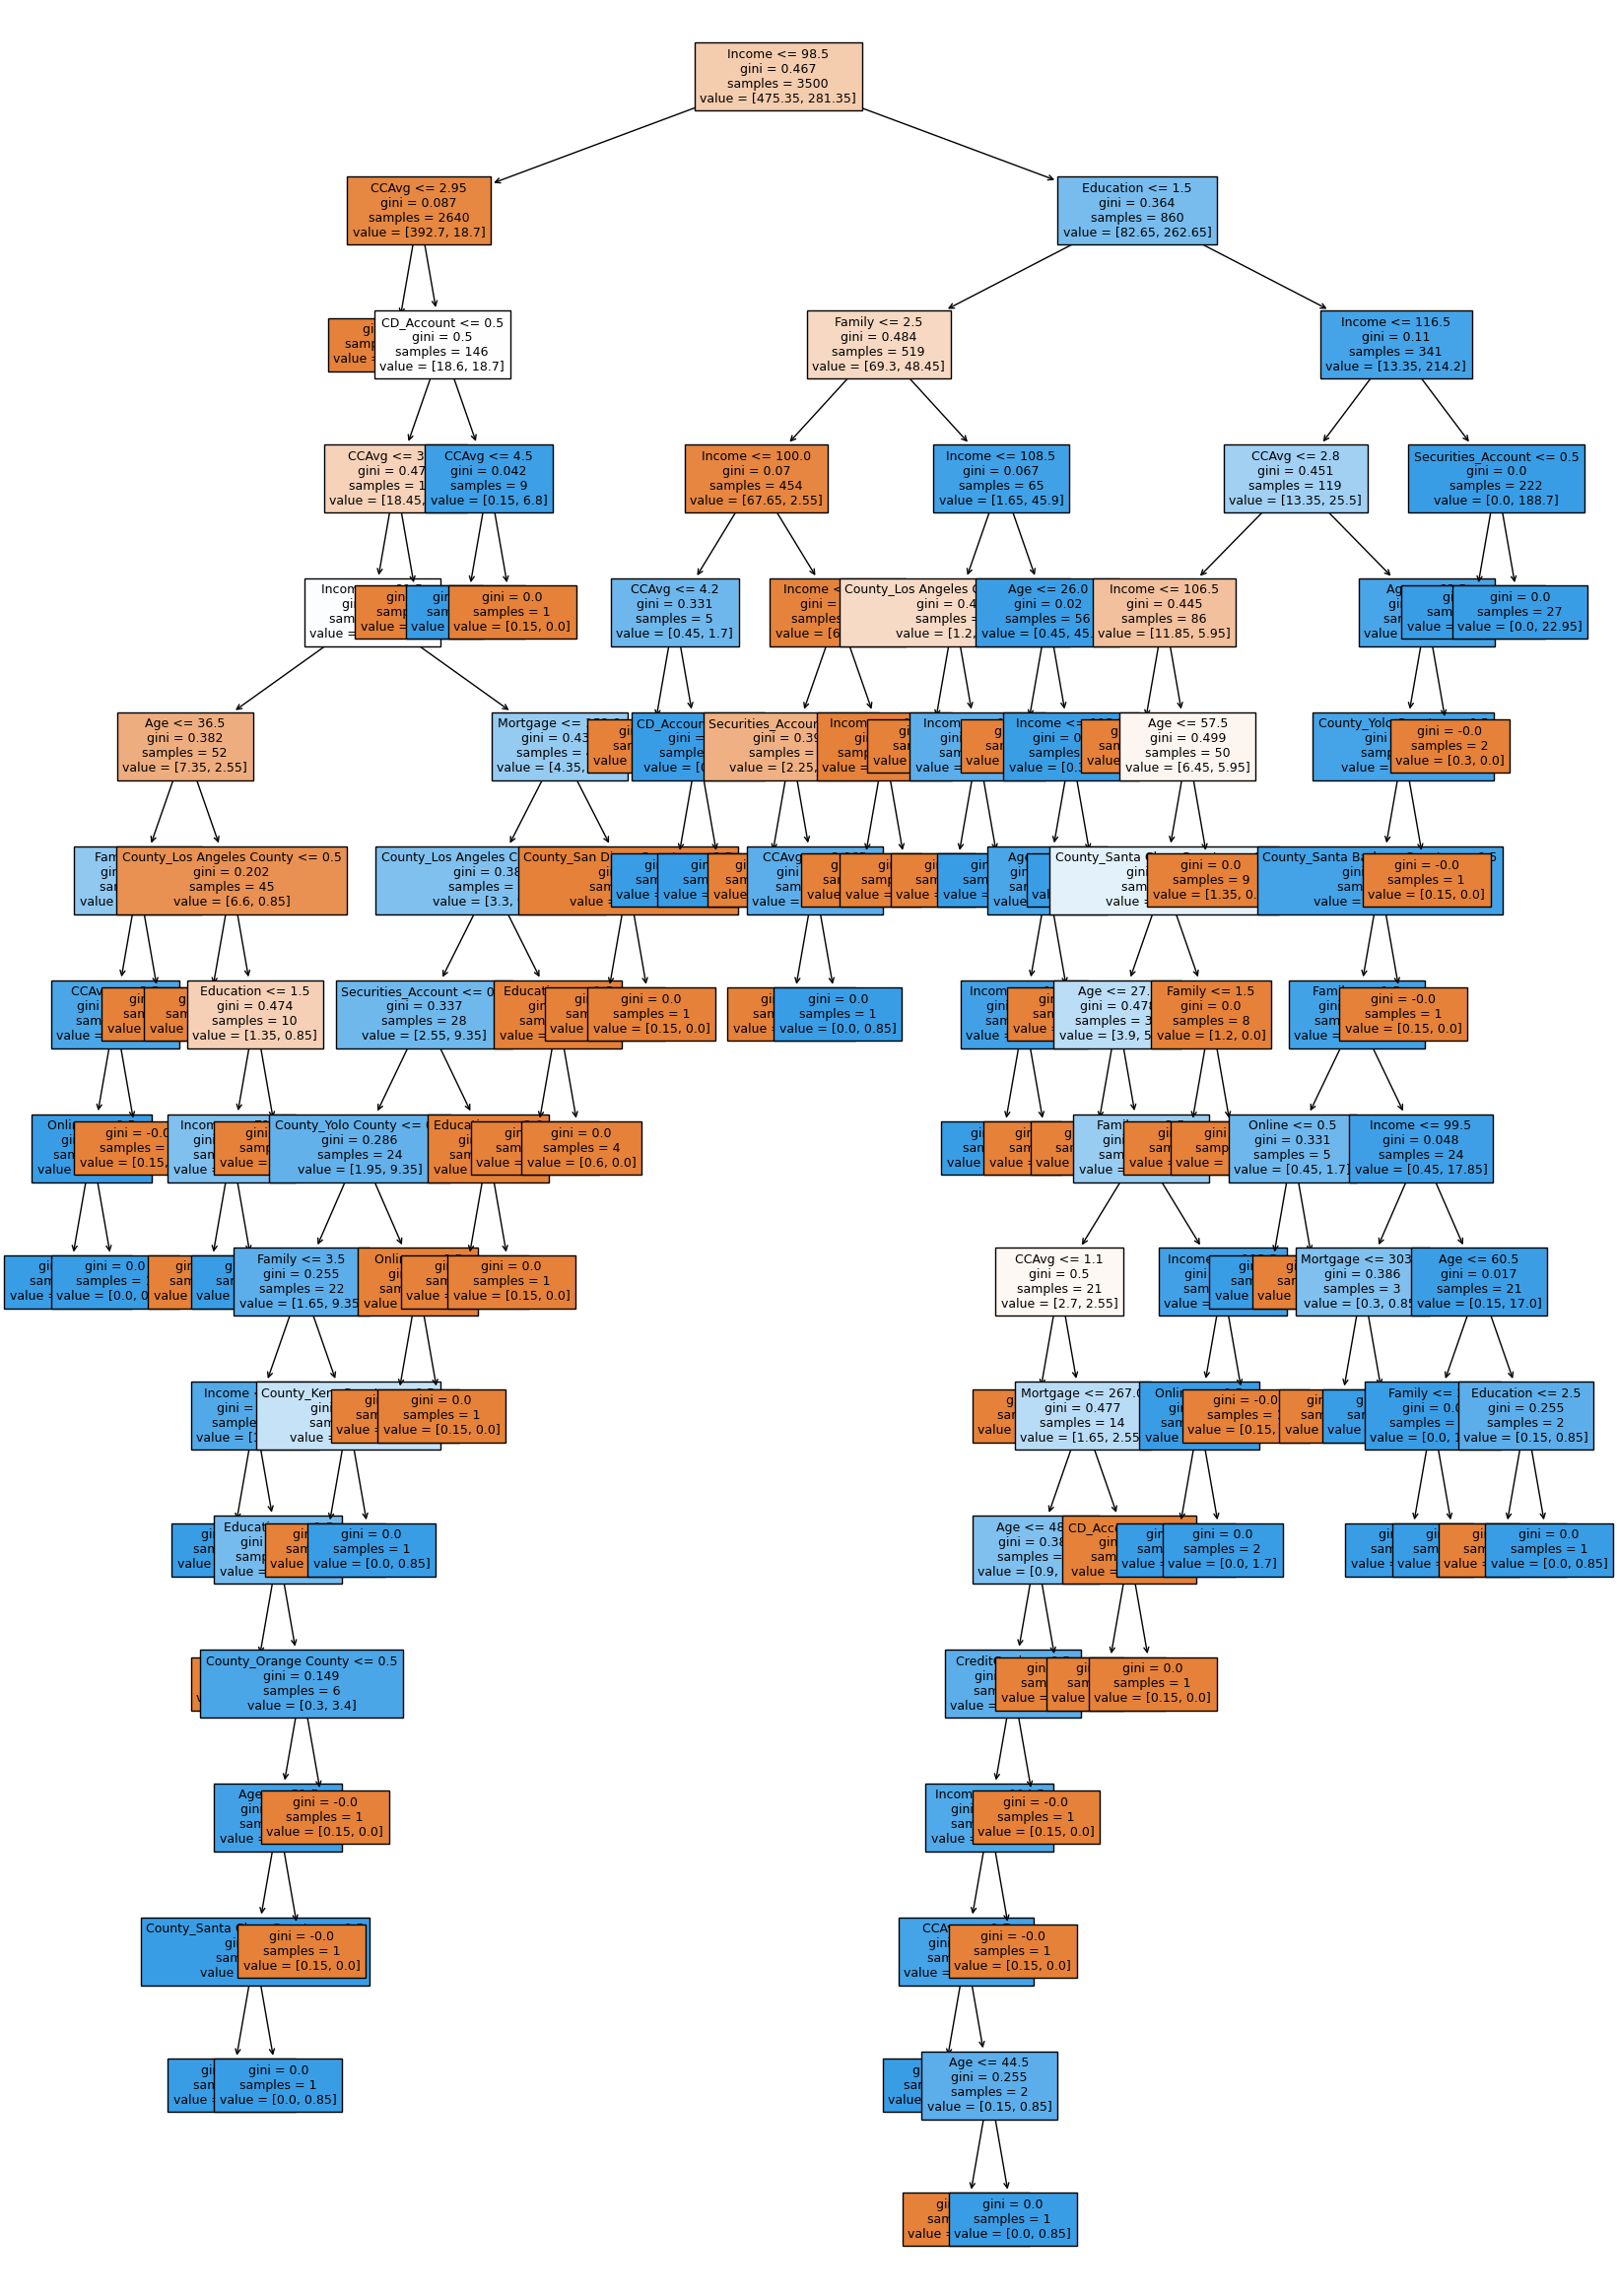

In [70]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
plt.show()

In [71]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- County_Los Angeles County <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.25, 0.00] class: 0
|   |   |   |   |   | 

In [72]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(model.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                                        Imp
Income                         5.932548e-01
Family                         1.442833e-01
Education                      1.286617e-01
CCAvg                          8.124701e-02
Age                            1.422724e-02
CD_Account                     1.099955e-02
Mortgage                       6.155754e-03
County_Los Angeles County      5.867629e-03
Securities_Account             4.976279e-03
County_Santa Clara County      2.208411e-03
Online                         2.013197e-03
County_Kern County             1.990057e-03
County_Yolo County             1.952676e-03
County_Santa Barbara County    7.699944e-04
County_Orange County           7.469342e-04
CreditCard                     6.454592e-04
County_San Diego County        1.253189e-17
County_El Dorado County        0.000000e+00
County_San Joaquin County      0.000000e+00
County_San Luis Obispo County  0.000000e+00
County_San Mateo County        0.000000e+00
County_Santa Cruz County       0

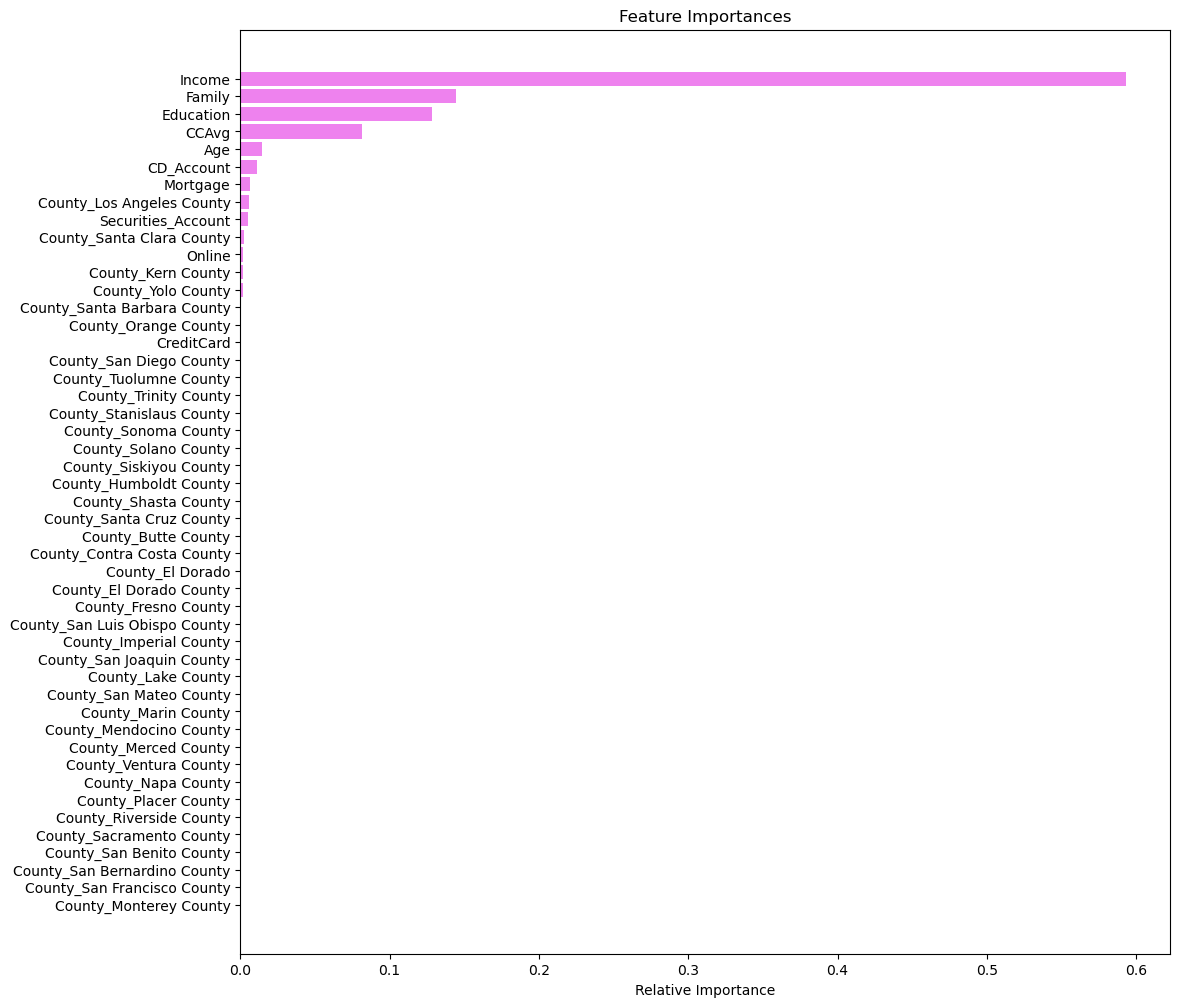

In [73]:
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####Observations
According to this first decision tree model, Income is the biggest predictor of loan offer acceptance, followed by higher education , average credit card spending, family and age.

###Confusion Matrix - first decision tree on test data

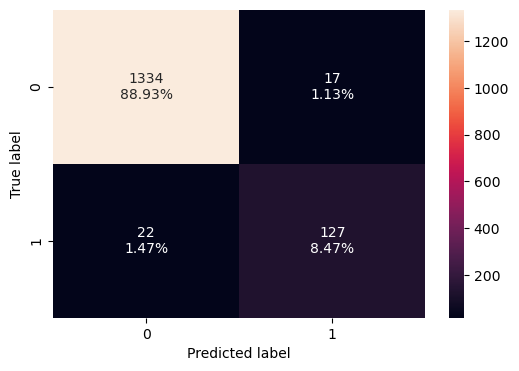

In [74]:
confusion_matrix_sklearn(model, X_test, y_test) 

In [75]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.974,0.852349,0.881944,0.866894


####Observations
- Recall for this model on training and test data sets is 1 and 0.85 
- Clearly this model is overfitting to the training data.

### Model Performance Improvement

###Using GridSearch for Hyperparameter tuning of our tree model

- Let's see if we can improve our model performance even more with the GridSearch Hyperparamter tuning technique.

In [76]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1,10), 
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'max_leaf_nodes' : [5, 10, 15, 20, 25, 30]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=1)

###Confusion Matrix - decision tree with tuned hyperparameters on training data

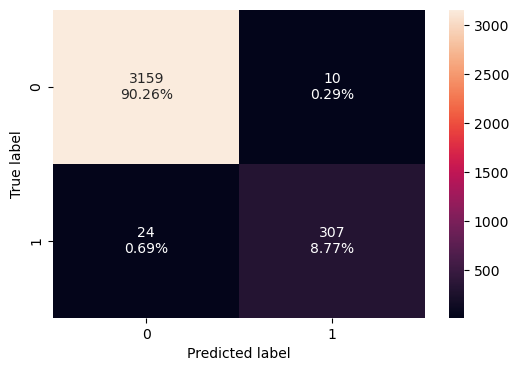

In [77]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [78]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


###Visualizing the second hyperparameter-tuned decision tree

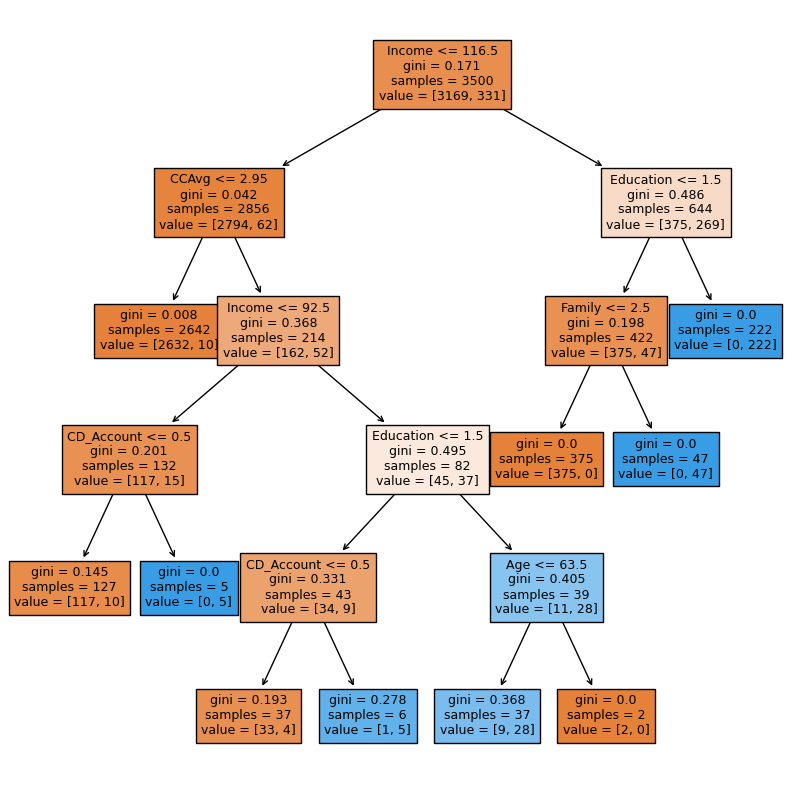

In [79]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

In [80]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1

In [81]:
print(pd.DataFrame(estimator.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                                    Imp
Education                      0.446191
Income                         0.327387
Family                         0.155083
CCAvg                          0.042061
CD_Account                     0.025243
Age                            0.004035
County_Santa Clara County      0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Santa Barbara County    0.000000
County_Shasta County           0.000000
County_Santa Cruz County       0.000000
County_Riverside County        0.000000
County_Siskiyou County         0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000
County_Trinity County          0.000000
County_Tuolumne County         0.000000


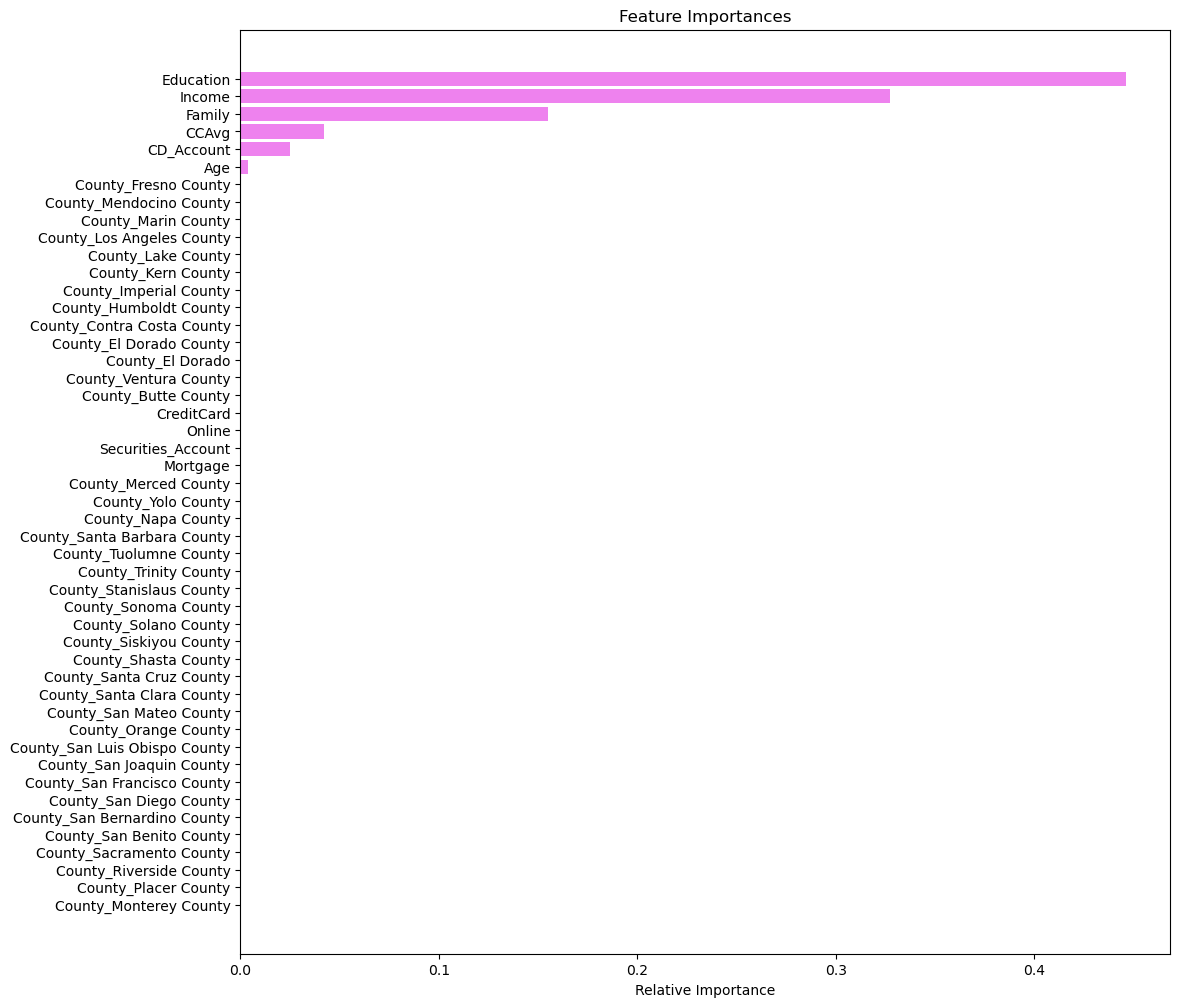

In [82]:
importances = estimator.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####Observations
- According to this tuned model, the most important features are income, family, higher education, credit card spending, credit card with other banks and customer age.
- Also, recall on the training data is 0.927 now which means overfitting is reduced.

####Confusion Matrix - decision tree with tuned hyperparameters on test data

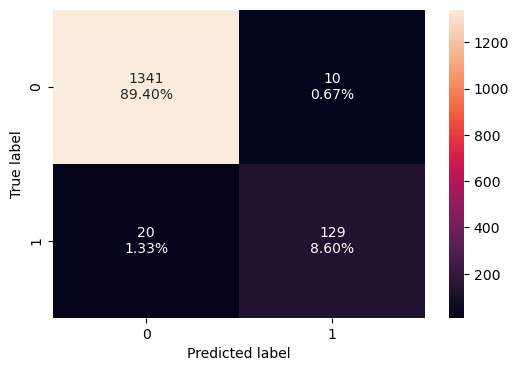

In [83]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [84]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


####Observations
- Recall for this model on test data sets is 0.865 which is slightly higher than our previous model. Let's see how we can improve this further with cost-complexity based pruning.

###Cost Complexity Pruning

Finding effective alphas and the corresponding total leaf impurities.

In [85]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [86]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000187,0.000562
2,0.000269,0.001636
3,0.000273,0.002182
4,0.000274,0.004371
5,0.000359,0.005447
6,0.000381,0.005828
7,0.000381,0.006209
8,0.000381,0.006590
9,0.000381,0.006971


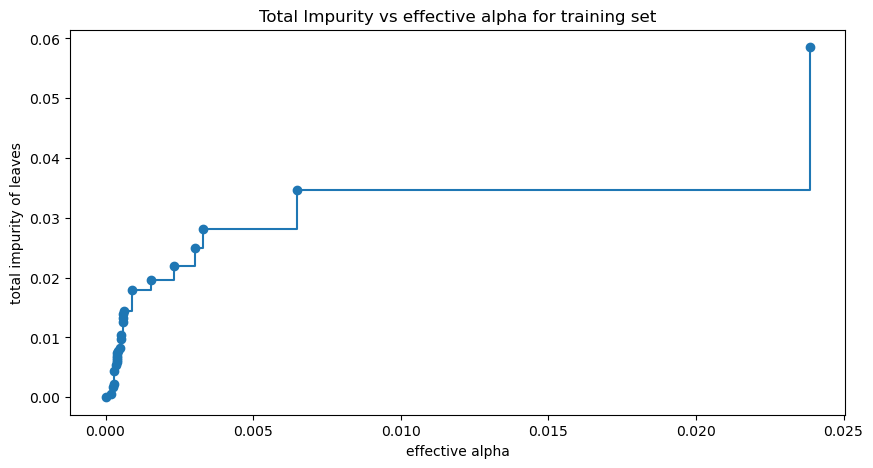

In [87]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Train multiple decision trees using the effective alphas. 

In [88]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85})
    clf.fit(X_train, y_train)   
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 7 with ccp_alpha: 0.056364969335601575


Number of nodes and tree depth decreases as alpha increases.

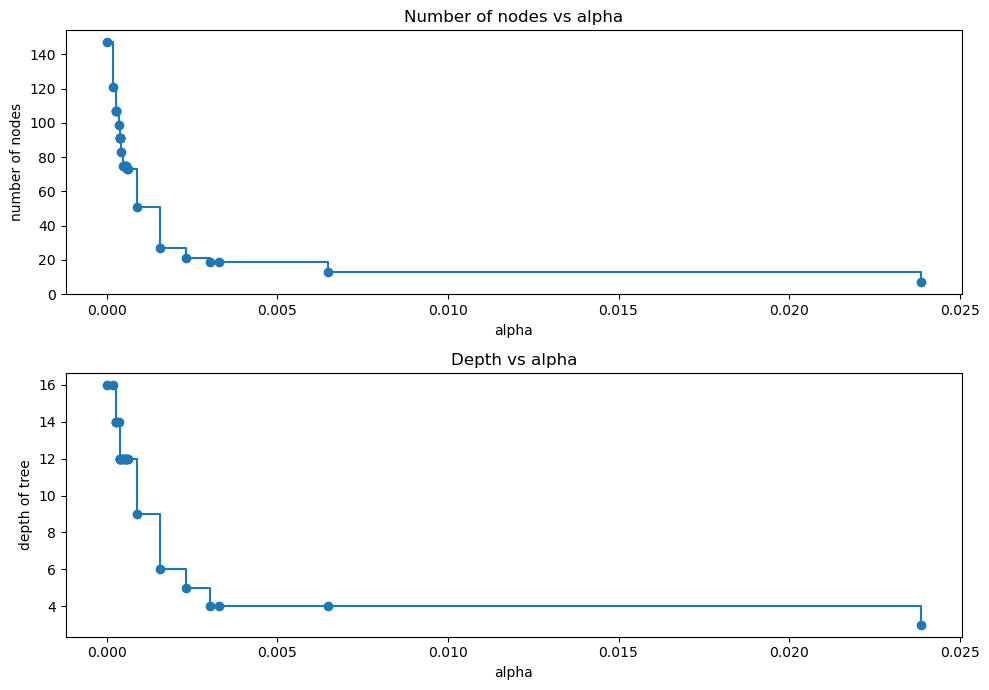

In [89]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

###Recall vs alpha for train and test sets
As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

In [90]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

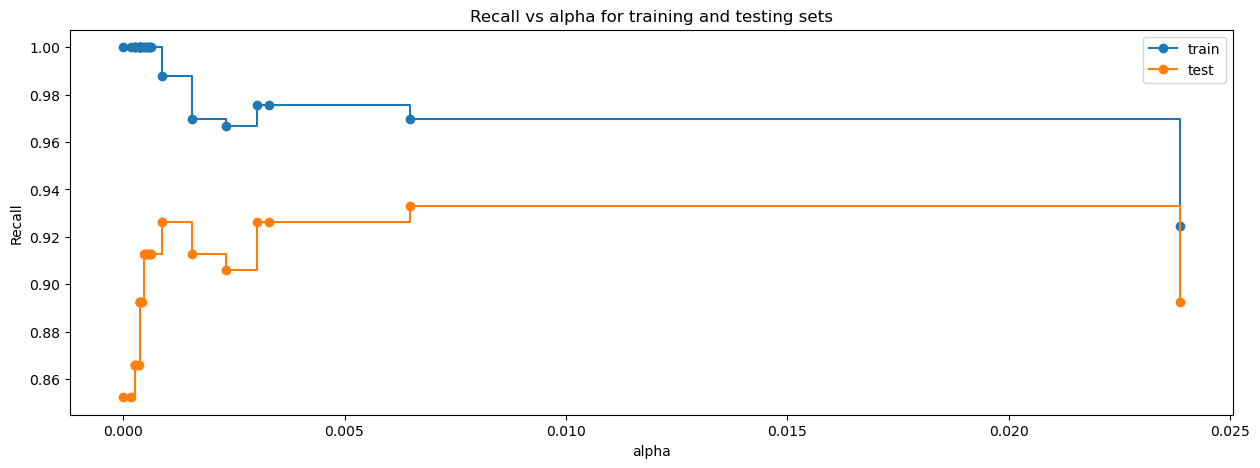

In [91]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [92]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model.ccp_alpha)

0.006472814718223811


In [93]:
estimator_2 = DecisionTreeClassifier(ccp_alpha=0.006472814718223811, class_weight={0: 0.15, 1: 0.85}, random_state=1  )
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006472814718223811,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

###Confusion Matrix - post-pruned decision tree on training data

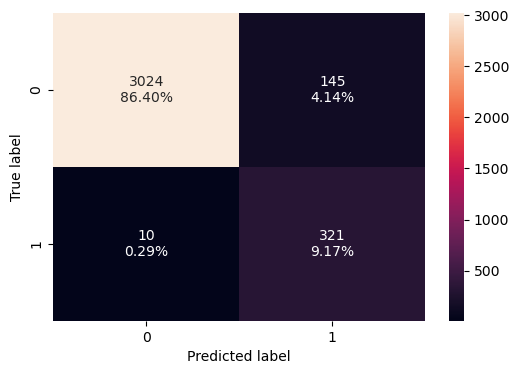

In [94]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [95]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.955714,0.969789,0.688841,0.805521


###Visualizing post-pruned decision tree

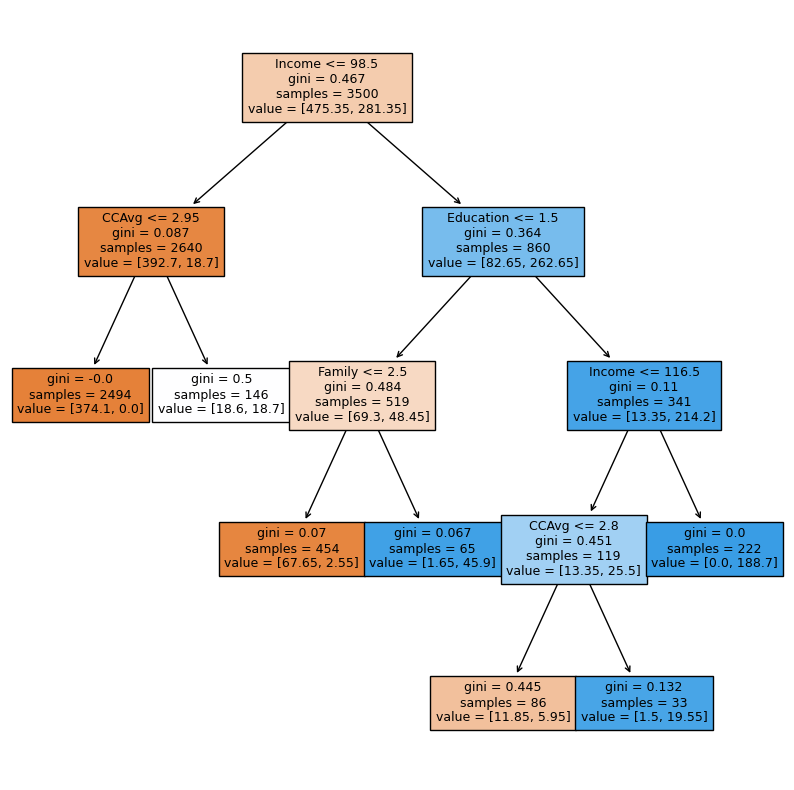

In [96]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

In [97]:
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- weights: [11.85, 5.95] class: 0
|   |   |   |--- CCAvg >  2.80
|   |   |   |   |--- weights: [1.50, 19.55] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



In [98]:
print(pd.DataFrame(estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                                    Imp
Income                         0.631776
Family                         0.154827
Education                      0.137875
CCAvg                          0.075522
Age                            0.000000
County_Santa Barbara County    0.000000
County_Sacramento County       0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Santa Cruz County       0.000000
County_Santa Clara County      0.000000
County_Placer County           0.000000
County_Shasta County           0.000000
County_Siskiyou County         0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000
County_Trinity County          0.000000
County_Tuolumne County         0.000000


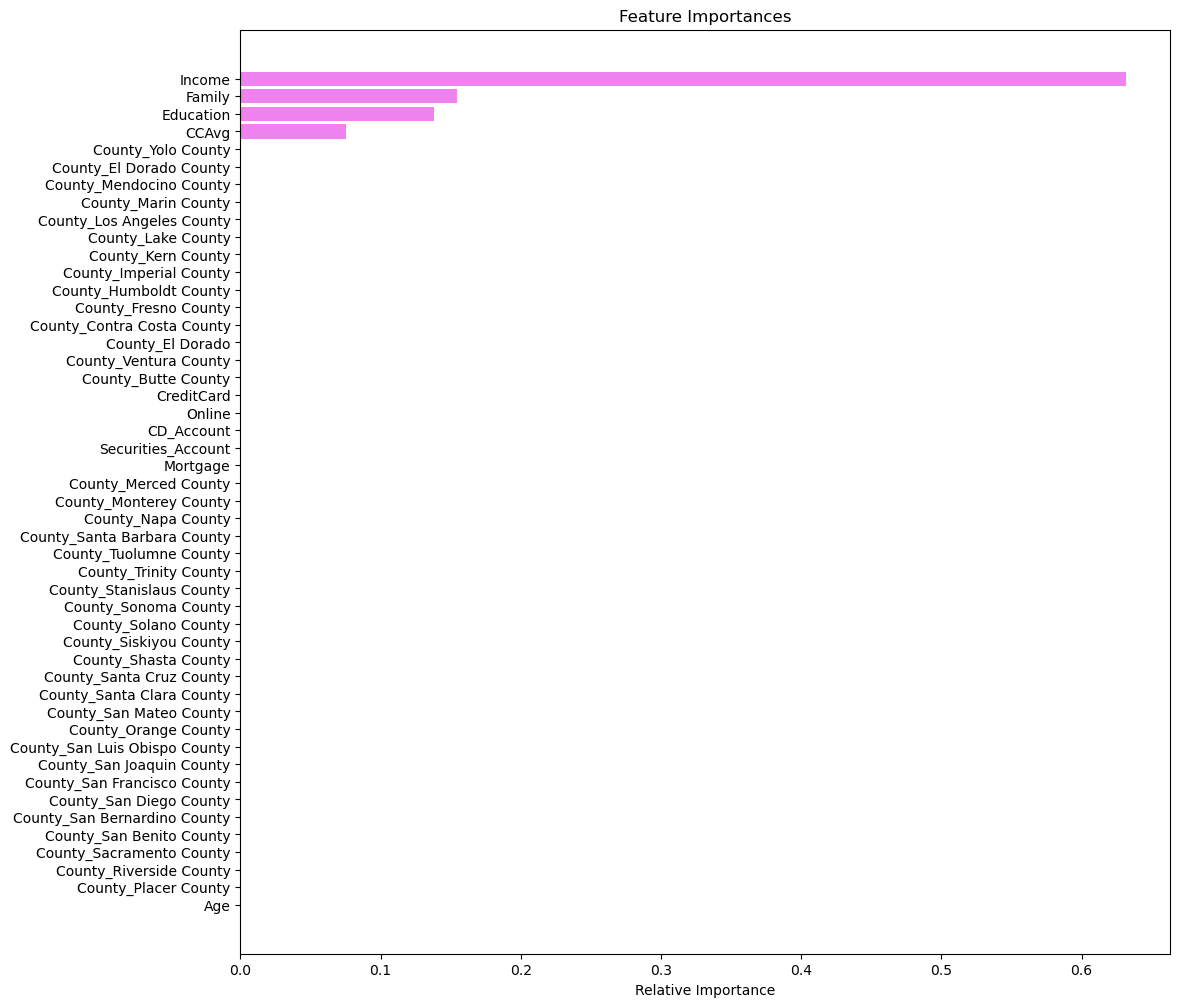

In [99]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####Observations
- According to this post-pruned model, the most important features are income, family, education and credit card spending.
- Also, recall on the training data has is 0.969.

###Confusion Matrix - post-pruned decision tree on test data

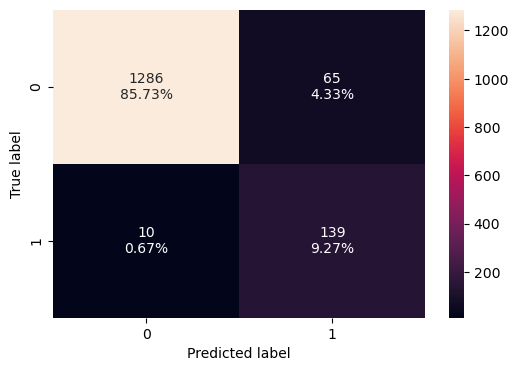

In [100]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [101]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.95,0.932886,0.681373,0.787535


####Observations
- Recall for this model on test data sets is 0.93 which is higher than our previous model.

## Model Comparison and Final Model Selection

In [102]:
models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.990286,0.955714
Recall,1.0,0.927492,0.969789
Precision,1.0,0.968454,0.688841
F1,1.0,0.947531,0.805521


In [103]:
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.974000,0.980000,0.950000
Recall,0.852349,0.865772,0.932886
Precision,0.881944,0.928058,0.681373
F1,0.866894,0.895833,0.787535


####Observations
- The post-pruned model has the highest recall without overfitting in either test or training data and this is what we will select for our loan campaign improvement.

## Actionable Insights and Business Recommendations


####Conclusions
- Income, Education, Family, and monthly average credit card spending (CCAvg) are the most important features in predicting potential loan customers.
  - The higher the income, the more chances the customer will accept a personal loan, especially incomes >$100K.
  - Customers with higher levels of education are more likely to accept personal loan offers.
  - Customers with family size of 2 and above are more likely to accept personal loans than those who are single.
  - Customers with an average monthly credit card spending above $2000 are more likely to accept personal loan offers.
- The best performing decision tree model was derived from the cost complexity pruning technique where the original tree was post pruned via ccp_alpha=0.006472814718223811 and gave the below Recall values for test and training data sets:
        Recall on Train Data = 0.969789
        Recall on Test Data = 0.932886
- Although it didn't show up in our selected model, Personal_loan is also positively correlated with CD_account, Mortgage and Securities_Account.
- From K-Cluster analysis, we found 4 distinct customer segments:
        1. Group 0: High income, low mortgage, family >1, higher than avg monthly credit card spending
        2. Group 1: High income, high mortgage, family >2, higher than avg monthly credit card spending
        3. Group 2: Low income, no mortgage, family >2, less than avg monthly credit card spending
        4. Group 3: Low income, high mortgage, family >2, higher than avg monthly credit card spending
- Among these, Groups 0 and 1 have high loan acceptance rates at 33.2% and 31.8% whereas Groups 2 and 3 have really low loan acceptance rates at 0.89% and 4.53%.
- Out of the 39 counties represented in the data, 14 counties have a loan acceptance rate higher than 9.5% which is the total acceptance rate for the entire dataset.

####Recommendations:
- Generally, we see that customers between ages 35-45 years who may have big life expenditures like home, family and higher education are good targets for the loan campaign.
- To be more specific, according to our decision tree, the following customer profiles emerge that can be targeted to improve loan offer acceptance rates:
        1. Low income (<\$98.5K) and high CCAvg (>\$2.95)
        2. High income (>\$98.5), undergraduate Education (<= 1.50) and bigger Family (>2.50)
        3. High income (>\$98.5, <=116.5), advanced Education (>1.50) and high CCAvg (>\$2.80)
        4. High Income (>\$116.50), advanced Education (>1.50)
- Alternatively, the bank can target Group 0 and 1 from the cluster analysis who represent high income, high spender customers with growing families and high loan offer acceptance rates. Since these customers have high incomes, they can be shown pre-approved loan offers and assigned relationship managers to further elevate loan acceptance rates.
- The 14 counties that have a higher loan acceptance offer can be prioritized for the campaign rollout. Parallely customer surveys can be deployed in the other counties to understand their financial needs better and thus tailor future products.
- Customers with mortgages >\$100k USD also represent a good target for the new loans. These customers probably need the personal loan due to high mortgage installments but may be at default risk as well.
- As customers who use the online facilities were more likely to have personal loans, a good initiative would be to drive more customers to sign up for internet banking and improving the loan offer acceptance user flows across web and mobile apps.
- The marketing team should also consider targeting customers with CD accounts. These customers pose less risk as their deposits can be used as collateral for personal loans where need be.
- Finally, as the bank acquires new customers and existing customer data changes, the bank should tune and improve the model continously.